In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as mp
import seaborn as sb
import pandas as pd
import numpy as np
import math

In [3]:
df_scouting = pd.read_csv("Scouting Wisconsin 6017 (respuestas) - Respuestas de formulario 1.csv")

In [4]:
df_scouting

Marca temporal Scouter   Match  Team  Cubes [Lvl 1]  Cubes [Lvl 2]  \
0     24/03/2023 8:29:46    Josué      4    93              0              0   
1     24/03/2023 9:38:42    Josué     13    93              0              0   
2    24/03/2023 12:30:03   Delfin     29    93              0              0   
3    24/03/2023 12:32:23      Pao     29    93              0              0   
4    24/03/2023 13:19:17    Erick     35    93              0              0   
..                   ...      ...    ...   ...            ...            ...   
317  24/03/2023 17:23:01  Clarisa     67  8847              1              0   
318   25/03/2023 9:04:03  Clarisa     80  8188              0              0   
319   25/03/2023 9:14:19  Clarisa     81  4786              0              0   
320   25/03/2023 9:20:39  Clarisa     82   706              0              0   
321   25/03/2023 9:58:16     Alex     87  2202              1              0   

     Cubes [Lvl 3]  Cones [Lvl 1]  Cones [Lvl 2]  Cones [Lvl 3]  ...  \
0                0              0              0              1  ...   
1                1              0              0              0  ...   
2                1              0              0              0  ...   
3                0              0              0              1  ...   
4                1              0              0              0  ...   
..             ...            ...            ...            ...  ...   
317              0              0              0              0  ...   
318              0              0              0              0  ...   
319              1              0              0              0  ...   
320              0              0              0              1  ...   
321              0              0              0              0  ...   

    Cones [Lvl 3].1 Park Docked (Is CS not balanced) Engaged (Balanced).1  \
0                 1    1                           0                    0   
1                 2    0                           0                    1   
2                 2    1                           1                    1   
3                 1    1                           0                    1   
4                 0    0                           0                    1   
..              ...  ...                         ...                  ...   
317               0    0                           0                    1   
318               0    0                           0                    0   
319               2    0                           0                    1   
320               3    0                           0                    1   
321               3   No                          Sí                   Sí   

     Double balance  Triple balance  Disconnection time +- (sec)  \
0                 0               0                            0   
1                 1               0                            0   
2                 0               1                            0   
3                 0               1                            0   
4                 1               0                            0   
..              ...             ...                          ...   
317               1               0                            0   
318               0               0                          120   
319               1               0                            0   
320               1               1                            0   
321              Sí              No                            0   

     Agressiveness  Foul and cards comments  \
0                1                      NaN   
1                1                      NaN   
2                2                      NaN   
3                1                      NaN   
4                3                      NaN   
..             ...                      ...   
317              1                      NaN   
318              1                      NaN   
319              1 

In [5]:
df_scouting.columns

Index(['Marca temporal', 'Scouter ', 'Match', 'Team', 'Cubes [Lvl 1]',
       'Cubes [Lvl 2]', 'Cubes [Lvl 3]', 'Cones [Lvl 1]', 'Cones [Lvl 2]',
       'Cones [Lvl 3]', 'Mobility', 'Docked (In CS not balanced)',
       'Engaged (Balanced)', 'Aditional auto comments', 'Cubes [Lvl 1].1',
       'Cubes [Lvl 2].1', 'Cubes [Lvl 3].1', 'Cones [Lvl 1].1',
       'Cones [Lvl 2].1', 'Cones [Lvl 3].1', 'Park',
       'Docked (Is CS not balanced)', 'Engaged (Balanced).1', 'Double balance',
       'Triple balance', 'Disconnection time +- (sec)', 'Agressiveness',
       'Foul and cards comments',
       'Any additional comments (Did the robot play good defense, did it fall or make oyher robot fall, did it changed any links, did smth very stupid or very smart, etc)'],
      dtype='object')

In [6]:
df_scouting.dtypes

Marca temporal                                                                                                                                                        object
Scouter                                                                                                                                                               object
Match                                                                                                                                                                  int64
Team                                                                                                                                                                   int64
Cubes [Lvl 1]                                                                                                                                                          int64
Cubes [Lvl 2]                                                                                                                          

In [7]:
df_scouting = df_scouting.drop(["Marca temporal", "Scouter ", "Aditional auto comments", "Foul and cards comments", "Any additional comments (Did the robot play good defense, did it fall or make oyher robot fall, did it changed any links, did smth very stupid or very smart, etc)"], axis=1)
df_scouting

Match  Team  Cubes [Lvl 1]  Cubes [Lvl 2]  Cubes [Lvl 3]  Cones [Lvl 1]  \
0        4    93              0              0              0              0   
1       13    93              0              0              1              0   
2       29    93              0              0              1              0   
3       29    93              0              0              0              0   
4       35    93              0              0              1              0   
..     ...   ...            ...            ...            ...            ...   
317     67  8847              1              0              0              0   
318     80  8188              0              0              0              0   
319     81  4786              0              0              1              0   
320     82   706              0              0              0              0   
321     87  2202              1              0              0              0   

     Cones [Lvl 2]  Cones [Lvl 3] Mobility Docked (In CS not balanced)  ...  \
0                0              1        1                           0  ...   
1                0              0        0                           0  ...   
2                0              0        1                           0  ...   
3                0              1        1                           0  ...   
4                0              0        1                           0  ...   
..             ...            ...      ...                         ...  ...   
317              0              0        1                           0  ...   
318              0              0        0                           0  ...   
319              0              0        0                           0  ...   
320              0              1        0                           0  ...   
321              0              0       Sí                          Sí  ...   

    Cones [Lvl 1].1  Cones [Lvl 2].1  Cones [Lvl 3].1  Park  \
0                 2                0                1     1   
1                 1                2                2     0   
2                 0                2                2     1   
3                 0                2                1     1   
4                 3                0                0     0   
..              ...              ...              ...   ...   
317               0                0                0     0   
318               0                0                0     0   
319               0                0                2     0   
320               0                0                3     0   
321               1                0                3    No   

     Docked (Is CS not balanced)  Engaged (Balanced).1  Double balance  \
0                              0                     0               0   
1                              0                     1               1   
2                              1                     1               0   
3                              0                     1               0   
4                              0                     1               1   
..                           ...                   ...             ...   
317                            0                     1               1   
318                            0                     0               0   
319                            0                     1               1   
320                            0                     1               1   
321                           Sí                    Sí              Sí   

    Triple balance Disconnection time +- (sec) Agressiveness  
0                0                           0             1  
1                0                           0             1  
2                1                           0             2  
3                1                           0             1  
4                0                           0             3  
..             ...                         ...           ...  
317     

In [8]:
df_scouting.rename(columns={"Cubes [Lvl 1]": "Cub_L1_A",
                            "Cubes [Lvl 2]": "Cub_L2_A", 
                            "Cubes [Lvl 3]": "Cub_L3_A", 
                            "Cones [Lvl 1]": "Con_L1_A", 
                            "Cones [Lvl 2]": "Con_L2_A", 
                            "Cones [Lvl 3]": "Con_L3_A", 
                            "Docked (In CS not balanced)": "Docked_A", 
                            "Engaged (Balanced)": "Engaged_A", 
                            "Cubes [Lvl 1].1": "Cub_L1_T", 
                            "Cubes [Lvl 2].1": "Cub_L2_T", 
                            "Cubes [Lvl 3].1": "Cub_L3_T", 
                            "Cones [Lvl 1].1": "Con_L1_T", 
                            "Cones [Lvl 2].1": "Con_L2_T", 
                            "Cones [Lvl 3].1": "Con_L3_T", 
                            "Docked (Is CS not balanced)": "Docked_E", 
                            "Engaged (Balanced).1": "Engaged_E", 
                            "Disconnection time +- (sec)": "Disconection time"}, inplace=True)
df_scouting

Match  Team  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
0        4    93         0         0         0         0         0         1   
1       13    93         0         0         1         0         0         0   
2       29    93         0         0         1         0         0         0   
3       29    93         0         0         0         0         0         1   
4       35    93         0         0         1         0         0         0   
..     ...   ...       ...       ...       ...       ...       ...       ...   
317     67  8847         1         0         0         0         0         0   
318     80  8188         0         0         0         0         0         0   
319     81  4786         0         0         1         0         0         0   
320     82   706         0         0         0         0         0         1   
321     87  2202         1         0         0         0         0         0   

    Mobility Docked_A  ... Con_L1_T  Con_L2_T  Con_L3_T  Park  Docked_E  \
0          1        0  ...        2         0         1     1         0   
1          0        0  ...        1         2         2     0         0   
2          1        0  ...        0         2         2     1         1   
3          1        0  ...        0         2         1     1         0   
4          1        0  ...        3         0         0     0         0   
..       ...      ...  ...      ...       ...       ...   ...       ...   
317        1        0  ...        0         0         0     0         0   
318        0        0  ...        0         0         0     0         0   
319        0        0  ...        0         0         2     0         0   
320        0        0  ...        0         0         3     0         0   
321       Sí       Sí  ...        1         0         3    No        Sí   

     Engaged_E  Double balance Triple balance Disconection time Agressiveness  
0            0               0              0                 0             1  
1            1               1              0                 0             1  
2            1               0              1                 0             2  
3            1               0              1                 0             1  
4            1               1              0                 0             3  
..         ...             ...            ...               ...           ...  
317          1               1              0                 0             1  
318          0               0              0               120             1  
319          1               1              0                 0             1  
320          1               1              1                 0             1  
321         Sí              Sí             No                 0             1  

[322 rows x 24 columns]

In [9]:
df_scouting.isna().sum()

Match                0
Team                 0
Cub_L1_A             0
Cub_L2_A             0
Cub_L3_A             0
Con_L1_A             0
Con_L2_A             0
Con_L3_A             0
Mobility             0
Docked_A             0
Engaged_A            0
Cub_L1_T             0
Cub_L2_T             0
Cub_L3_T             0
Con_L1_T             0
Con_L2_T             0
Con_L3_T             0
Park                 0
Docked_E             0
Engaged_E            0
Double balance       0
Triple balance       0
Disconection time    0
Agressiveness        0
dtype: int64

In [10]:
df_scouting.nunique()

Match                74
Team                 47
Cub_L1_A              2
Cub_L2_A              2
Cub_L3_A              3
Con_L1_A              2
Con_L2_A              2
Con_L3_A              3
Mobility              3
Docked_A              3
Engaged_A             3
Cub_L1_T              9
Cub_L2_T              4
Cub_L3_T              5
Con_L1_T              4
Con_L2_T              5
Con_L3_T              6
Park                  3
Docked_E              3
Engaged_E             3
Double balance        3
Triple balance        3
Disconection time    19
Agressiveness         5
dtype: int64

In [11]:
df_scouting["Mobility"].replace("Sí", "1", inplace=True)
df_scouting["Docked_A"].replace("Sí", "1", inplace=True)
df_scouting["Engaged_A"].replace("Sí", "1", inplace=True)
df_scouting["Park"].replace("Sí", "1", inplace=True)
df_scouting["Park"].replace("No", "0", inplace=True)
df_scouting["Docked_E"].replace("Sí", "1", inplace=True)
df_scouting["Engaged_E"].replace("Sí", "1", inplace=True)
df_scouting["Double balance"].replace("Sí", "1", inplace=True)
df_scouting["Triple balance"].replace("Sí", "1", inplace=True)
df_scouting["Triple balance"].replace("No", "0", inplace=True)
df_scouting.nunique()

Match                74
Team                 47
Cub_L1_A              2
Cub_L2_A              2
Cub_L3_A              3
Con_L1_A              2
Con_L2_A              2
Con_L3_A              3
Mobility              2
Docked_A              2
Engaged_A             2
Cub_L1_T              9
Cub_L2_T              4
Cub_L3_T              5
Con_L1_T              4
Con_L2_T              5
Con_L3_T              6
Park                  2
Docked_E              2
Engaged_E             2
Double balance        2
Triple balance        2
Disconection time    19
Agressiveness         5
dtype: int64

In [12]:
df_scouting["Park"].unique()

array(['1', '0'], dtype=object)

In [13]:
df_scouting = df_scouting.astype({'Mobility': int, 
                                  'Docked_A': int,
                                  'Engaged_A': int,
                                  'Park': int,
                                  'Docked_E': int,
                                  'Engaged_E': int,
                                  'Double balance': int,
                                  'Triple balance': int})

In [14]:
df_scouting.dtypes

Match                int64
Team                 int64
Cub_L1_A             int64
Cub_L2_A             int64
Cub_L3_A             int64
Con_L1_A             int64
Con_L2_A             int64
Con_L3_A             int64
Mobility             int32
Docked_A             int32
Engaged_A            int32
Cub_L1_T             int64
Cub_L2_T             int64
Cub_L3_T             int64
Con_L1_T             int64
Con_L2_T             int64
Con_L3_T             int64
Park                 int32
Docked_E             int32
Engaged_E            int32
Double balance       int32
Triple balance       int32
Disconection time    int64
Agressiveness        int64
dtype: object

In [15]:
df_scouting

Match  Team  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
0        4    93         0         0         0         0         0         1   
1       13    93         0         0         1         0         0         0   
2       29    93         0         0         1         0         0         0   
3       29    93         0         0         0         0         0         1   
4       35    93         0         0         1         0         0         0   
..     ...   ...       ...       ...       ...       ...       ...       ...   
317     67  8847         1         0         0         0         0         0   
318     80  8188         0         0         0         0         0         0   
319     81  4786         0         0         1         0         0         0   
320     82   706         0         0         0         0         0         1   
321     87  2202         1         0         0         0         0         0   

     Mobility  Docked_A  ...  Con_L1_T  Con_L2_T  Con_L3_T  Park  Docked_E  \
0           1         0  ...         2         0         1     1         0   
1           0         0  ...         1         2         2     0         0   
2           1         0  ...         0         2         2     1         1   
3           1         0  ...         0         2         1     1         0   
4           1         0  ...         3         0         0     0         0   
..        ...       ...  ...       ...       ...       ...   ...       ...   
317         1         0  ...         0         0         0     0         0   
318         0         0  ...         0         0         0     0         0   
319         0         0  ...         0         0         2     0         0   
320         0         0  ...         0         0         3     0         0   
321         1         1  ...         1         0         3     0         1   

     Engaged_E  Double balance  Triple balance  Disconection time  \
0            0               0               0                  0   
1            1               1               0                  0   
2            1               0               1                  0   
3            1               0               1                  0   
4            1               1               0                  0   
..         ...             ...             ...                ...   
317          1               1               0                  0   
318          0               0               0                120   
319          1               1               0                  0   
320          1               1               1                  0   
321          1               1               0                  0   

     Agressiveness  
0                1  
1                1  
2                2  
3                1  
4                3  
..             ...  
317              1  
318              1  
319              1  
320              1  
321              1  

[322 rows x 24 columns]

---

In [16]:
df_scouting_sort_team = df_scouting.sort_values(["Team"])
df_scouting_sort_team

Match  Team  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
0        4    93         0         0         0         0         0         1   
1       13    93         0         0         1         0         0         0   
2       29    93         0         0         1         0         0         0   
3       29    93         0         0         0         0         0         1   
4       35    93         0         0         1         0         0         0   
..     ...   ...       ...       ...       ...       ...       ...       ...   
314     54  8847         1         0         0         0         0         0   
315     54  8847         1         0         0         0         0         0   
316     62  8847         1         0         0         0         0         0   
317     67  8847         1         0         0         0         0         0   
309     13  8847         0         0         0         0         0         0   

     Mobility  Docked_A  ...  Con_L1_T  Con_L2_T  Con_L3_T  Park  Docked_E  \
0           1         0  ...         2         0         1     1         0   
1           0         0  ...         1         2         2     0         0   
2           1         0  ...         0         2         2     1         1   
3           1         0  ...         0         2         1     1         0   
4           1         0  ...         3         0         0     0         0   
..        ...       ...  ...       ...       ...       ...   ...       ...   
314         1         0  ...         0         0         0     0         0   
315         1         0  ...         0         0         0     0         0   
316         1         0  ...         0         0         0     1         0   
317         1         0  ...         0         0         0     0         0   
309         0         0  ...         0         0         0     1         1   

     Engaged_E  Double balance  Triple balance  Disconection time  \
0            0               0               0                  0   
1            1               1               0                  0   
2            1               0               1                  0   
3            1               0               1                  0   
4            1               1               0                  0   
..         ...             ...             ...                ...   
314          0               0               0                  6   
315          0               0               0                  0   
316          0               0               0                 28   
317          1               1               0                  0   
309          1               0               1                  0   

     Agressiveness  
0                1  
1                1  
2                2  
3                1  
4                3  
..             ...  
314              3  
315              4  
316              2  
317              1  
309              3  

[322 rows x 24 columns]

In [17]:
df_scouting_sort_team["Score_ind"] = ((df_scouting_sort_team["Cub_L1_A"]*3)+
                                      (df_scouting_sort_team["Cub_L2_A"]*4)+
                                      (df_scouting_sort_team["Cub_L3_A"]*6)+
                                      (df_scouting_sort_team["Con_L1_A"]*3)+
                                      (df_scouting_sort_team["Con_L2_A"]*4)+
                                      (df_scouting_sort_team["Con_L3_A"]*6)+
                                      (df_scouting_sort_team["Mobility"]*3)+
                                      (df_scouting_sort_team["Docked_A"]*8)+
                                      (df_scouting_sort_team["Engaged_A"]*12)+
                                      (df_scouting_sort_team["Cub_L1_T"]*2)+
                                      (df_scouting_sort_team["Cub_L2_T"]*3)+
                                      (df_scouting_sort_team["Cub_L3_T"]*5)+
                                      (df_scouting_sort_team["Con_L1_T"]*2)+
                                      (df_scouting_sort_team["Con_L2_T"]*3)+
                                      (df_scouting_sort_team["Con_L3_T"]*5)+
                                      (df_scouting_sort_team["Park"]*2)+
                                      (df_scouting_sort_team["Docked_E"]*6)+
                                      (df_scouting_sort_team["Engaged_E"]*10))
df_scouting_sort_team

Match  Team  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
0        4    93         0         0         0         0         0         1   
1       13    93         0         0         1         0         0         0   
2       29    93         0         0         1         0         0         0   
3       29    93         0         0         0         0         0         1   
4       35    93         0         0         1         0         0         0   
..     ...   ...       ...       ...       ...       ...       ...       ...   
314     54  8847         1         0         0         0         0         0   
315     54  8847         1         0         0         0         0         0   
316     62  8847         1         0         0         0         0         0   
317     67  8847         1         0         0         0         0         0   
309     13  8847         0         0         0         0         0         0   

     Mobility  Docked_A  ...  Con_L2_T  Con_L3_T  Park  Docked_E  Engaged_E  \
0           1         0  ...         0         1     1         0          0   
1           0         0  ...         2         2     0         0          1   
2           1         0  ...         2         2     1         1          1   
3           1         0  ...         2         1     1         0          1   
4           1         0  ...         0         0     0         0          1   
..        ...       ...  ...       ...       ...   ...       ...        ...   
314         1         0  ...         0         0     0         0          0   
315         1         0  ...         0         0     0         0          0   
316         1         0  ...         0         0     1         0          0   
317         1         0  ...         0         0     0         0          1   
309         0         0  ...         0         0     1         1          1   

     Double balance  Triple balance  Disconection time  Agressiveness  \
0                 0               0                  0              1   
1                 1               0                  0              1   
2                 0               1                  0              2   
3                 0               1                  0              1   
4                 1               0                  0              3   
..              ...             ...                ...            ...   
314               0               0                  6              3   
315               0               0                  0              4   
316               0               0                 28              2   
317               1               0                  0              1   
309               0               1                  0              3   

     Score_ind  
0           25  
1           49  
2           43  
3           32  
4           29  
..         ...  
314         10  
315         14  
316         16  
317         26  
309         32  

[322 rows x 25 columns]

In [18]:
df_mean_all = df_scouting.groupby(["Team"]).describe()
df_mean_all

Match                                                       Cub_L1_A  \
     count       mean        std   min    25%   50%    75%   max    count   
Team                                                                        
93     7.0  30.428571  18.866700   4.0  21.00  29.0  38.00  62.0      7.0   
537    7.0  43.857143  18.933467  12.0  33.00  50.0  56.00  67.0      7.0   
706    8.0  38.125000  25.853640   6.0  21.50  31.5  55.50  82.0      8.0   
930    6.0  44.333333  18.704723  23.0  29.25  43.5  58.50  68.0      6.0   
1091  10.0  42.400000  17.902203  16.0  28.25  46.0  51.00  67.0     10.0   
1259   5.0  37.800000  12.755391  20.0  31.00  39.0  47.00  52.0      5.0   
1306   6.0  26.000000  19.204166   1.0  13.50  25.5  36.75  54.0      6.0   
1675   6.0  23.000000  13.535139   5.0  13.50  23.5  32.75  40.0      6.0   
1714   5.0  43.200000  14.956604  24.0  33.00  44.0  55.00  60.0      5.0   
1732   8.0  38.125000  20.265647  10.0  24.00  37.5  51.00  70.0      8.0   
1792   6.0  42.666667  20.343713   9.0  34.25  45.5  56.75  65.0      6.0   
2062   7.0  39.428571  19.380894  12.0  27.00  36.0  54.00  66.0      7.0   
2077   6.0  29.000000  20.029978   7.0  14.50  24.5  42.75  58.0      6.0   
2194   6.0  40.000000  23.177575   5.0  30.00  38.5  55.25  70.0      6.0   
2202  10.0  38.700000  23.137512   5.0  25.00  39.0  47.75  87.0     10.0   
2358   5.0  33.000000  26.842131   4.0  10.00  31.0  55.00  65.0      5.0   
2506   4.0  30.750000  17.461863  15.0  18.75  27.0  39.00  54.0      4.0   
2512   5.0  36.400000  21.686401  10.0  25.00  32.0  49.00  66.0      5.0   
2830   8.0  43.750000  21.545633  16.0  25.50  43.0  63.75  69.0      8.0   
3067   5.0  34.000000  18.748333   8.0  25.00  33.0  52.00  52.0      5.0   
3197   5.0  46.800000  15.706686  26.0  35.00  52.0  58.00  63.0      5.0   
3418   7.0  30.285714  17.413733   7.0  18.00  30.0  42.00  55.0      7.0   
3596   5.0  23.800000  18.633304   2.0   9.00  26.0  34.00  48.0      5.0   
4786   8.0  41.375000  28.565401   3.0  19.25  40.0  66.00  81.0      8.0   
4787   8.0  36.750000  23.285495   6.0  20.75  34.0  55.75  70.0      8.0   
5096   5.0  31.800000  14.307341  11.0  27.00  32.0  40.00  49.0      5.0   
5148   7.0  34.857143  25.307631   2.0  16.50  32.0  54.00  69.0      7.0   
5822   8.0  32.625000  18.950594   5.0  20.25  34.0  40.25  64.0      8.0   
6017   5.0  34.200000  21.111608   6.0  27.00  33.0  41.00  64.0      5.0   
6160   9.0  39.777778  23.242083   1.0  28.00  40.0  55.00  70.0      9.0   
6223   8.0  30.625000  18.973195   3.0  17.75  30.0  47.00  53.0      8.0   
6381   7.0  36.571429  19.147299   9.0  24.00  38.0  48.50  64.0      7.0   
6421   8.0  34.000000  22.677868   5.0  15.75  32.5  49.75  66.0      8.0   
6574   8.0  31.625000  21.286733   7.0  15.00  30.0  40.00  68.0      8.0   
6643   6.0  27.833333  18.115371   3.0  18.00  29.0  34.00  56.0      6.0   
7417   6.0  33.000000  13.535139  16.0  23.75  32.5  40.50  53.0      6.0   
7900   7.0  40.428571  21.054351  14.0  22.50  45.0  55.00  69.0      7.0   
7915   4.0  26.750000  20.254629   8.0  12.50  23.0  37.25  53.0      4.0   
8029   6.0  30.000000  15.073155   9.0  19.50  32.0  40.75  48.0      6.0   
8096   7.0  37.571429  18.237847  16.0  23.50  38.0  47.00  68.0      7.0   
8122   6.0  40.666667  24.072114   4.0  25.00  50.0  57.00  64.0      6.0   
8188   8.0  42.250000  24.081706   6.0  26.75  40.5  56.50  80.0      8.0   
8531   8.0  36.250000  23.535687   6.0  17.50  32.5  59.00  65.0      8.0   
8701   8.0  46.750000  20.373302  10.0  36.00  48.5  64.25  68.0      8.0   
8802   9.0  42.222222  17.455499   8.0  38.00  43.0  50.00  69.0      9.0   
8803   9.0  35.888889  19.560448   8.0  20.00  35.0  51.00  65.0      9.0   
8847  10.0  39.000000  20.731082   8.0  22.50  39.0  54.00  67.0     10.0   

                ... Disconection time        Agressiveness            \
          mean  ...               75%    max         count      mean   
Team      

In [19]:
df_mean_all.columns[1]

('Match', 'mean')

In [150]:
df_mean_all.sort_values((["Cub_L3_A"]))

<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
<>:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
C:\Users\idg20\AppData\Local\Temp\ipykernel_21440\209405298.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df_mean_all.sort_values((["Cub_L3_A"]["mean"]), ascending=False)
C:\Users\idg20\AppData\Local\Temp\ipykernel_21440\209405298.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df_mean_all.sort_values((["Cub_L3_A"]["mean"]), ascending=False)
C:\Users\idg20\AppData\Local\Temp\ipykernel_21440\209405298.py:1: SyntaxWarning: list indices must be integers or slices, not str; perhaps you missed a comma?
  df_mean_all.sort_values((["Cub_L3_A"]["mean"]), ascending=False)


TypeError: list indices must be integers or slices, not str

In [144]:
for i in df_mean_all.columns:
    print(i[0])
df_mean_all

Cub_L1_A
Cub_L1_A
Cub_L1_A
Cub_L1_A
Cub_L1_A
Cub_L1_A
Cub_L1_A
Cub_L1_A
Cub_L2_A
Cub_L2_A
Cub_L2_A
Cub_L2_A
Cub_L2_A
Cub_L2_A
Cub_L2_A
Cub_L2_A
Cub_L3_A
Cub_L3_A
Cub_L3_A
Cub_L3_A
Cub_L3_A
Cub_L3_A
Cub_L3_A
Cub_L3_A
Con_L1_A
Con_L1_A
Con_L1_A
Con_L1_A
Con_L1_A
Con_L1_A
Con_L1_A
Con_L1_A
Con_L2_A
Con_L2_A
Con_L2_A
Con_L2_A
Con_L2_A
Con_L2_A
Con_L2_A
Con_L2_A
Con_L3_A
Con_L3_A
Con_L3_A
Con_L3_A
Con_L3_A
Con_L3_A
Con_L3_A
Con_L3_A
Mobility
Mobility
Mobility
Mobility
Mobility
Mobility
Mobility
Mobility
Docked_A
Docked_A
Docked_A
Docked_A
Docked_A
Docked_A
Docked_A
Docked_A
Engaged_A
Engaged_A
Engaged_A
Engaged_A
Engaged_A
Engaged_A
Engaged_A
Engaged_A
Cub_L1_T
Cub_L1_T
Cub_L1_T
Cub_L1_T
Cub_L1_T
Cub_L1_T
Cub_L1_T
Cub_L1_T
Cub_L2_T
Cub_L2_T
Cub_L2_T
Cub_L2_T
Cub_L2_T
Cub_L2_T
Cub_L2_T
Cub_L2_T
Cub_L3_T
Cub_L3_T
Cub_L3_T
Cub_L3_T
Cub_L3_T
Cub_L3_T
Cub_L3_T
Cub_L3_T
Con_L1_T
Con_L1_T
Con_L1_T
Con_L1_T
Con_L1_T
Con_L1_T
Con_L1_T
Con_L1_T
Con_L2_T
Con_L2_T
Con_L2_T
Con_L2_T
Con_L2_T
Con_L2_T
Co

Cub_L1_A                                                Cub_L2_A  \
        count      mean       std  min   25%  50%   75%  max    count   
Team                                                                    
93        7.0  0.285714  0.487950  0.0  0.00  0.0  0.50  1.0      7.0   
537       7.0  0.285714  0.487950  0.0  0.00  0.0  0.50  1.0      7.0   
706       8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
930       6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      6.0   
1091     10.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0     10.0   
1259      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
1306      6.0  0.333333  0.516398  0.0  0.00  0.0  0.75  1.0      6.0   
1675      6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      6.0   
1714      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
1732      8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
1792      6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      6.0   
2062      7.0  0.142857  0.377964  0.0  0.00  0.0  0.00  1.0      7.0   
2077      6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      6.0   
2194      6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      6.0   
2202     10.0  0.700000  0.483046  0.0  0.25  1.0  1.00  1.0     10.0   
2358      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
2506      4.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      4.0   
2512      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
2830      8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
3067      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
3197      5.0  0.200000  0.447214  0.0  0.00  0.0  0.00  1.0      5.0   
3418      7.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      7.0   
3596      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
4786      8.0  0.125000  0.353553  0.0  0.00  0.0  0.00  1.0      8.0   
4787      8.0  0.125000  0.353553  0.0  0.00  0.0  0.00  1.0      8.0   
5096      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
5148      7.0  0.142857  0.377964  0.0  0.00  0.0  0.00  1.0      7.0   
5822      8.0  0.750000  0.462910  0.0  0.75  1.0  1.00  1.0      8.0   
6017      5.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      5.0   
6160      9.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      9.0   
6223      8.0  0.250000  0.462910  0.0  0.00  0.0  0.25  1.0      8.0   
6381      7.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      7.0   
6421      8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
6574      8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
6643      6.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      6.0   
7417      6.0  1.000000  0.000000  1.0  1.00  1.0  1.00  1.0      6.0   
7900      7.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      7.0   
7915      4.0  0.250000  0.500000  0.0  0.00  0.0  0.25  1.0      4.0   
8029      6.0  0.666667  0.516398  0.0  0.25  1.0  1.00  1.0      6.0   
8096      7.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      7.0   
8122      6.0  0.333333  0.516398  0.0  0.00  0.0  0.75  1.0      6.0   
8188      8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
8531      8.0  0.375000  0.517549  0.0  0.00  0.0  1.00  1.0      8.0   
8701      8.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      8.0   
8802      9.0  0.555556  0.527046  0.0  0.00  1.0  1.00  1.0      9.0   
8803      9.0  0.000000  0.000000  0.0  0.00  0.0  0.00  0.0      9.0   
8847     10.0  0.700000  0.483046  0.0  0.25  1.0  1.00  1.0     10.0   

                ... Disconection time        Agressiveness            \
          mean  ...               75%    max         count      mean   
Team            ...                                                    
93    0.000000  ...              0.00    0.0           7.0  1.571429   
537   0.285714  ...              0.50    8.0           7.0  1.7142

In [118]:
df_mean_all.to_csv("descriptionAllTeams.csv", encoding= 'utf-8-sig')

In [20]:
df_scouting_by_teams = df_scouting.groupby(["Team"]).sum()

In [21]:
df_scouting_by_teams

Match  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
Team                                                                      
93      213         2         0         4         0         0         2   
537     307         2         2         1         0         0         0   
706     305         0         0         2         0         0         4   
930     266         0         1         1         0         0         5   
1091    424         0         0         4         3         0         0   
1259    189         0         0         1         0         1         3   
1306    156         2         0         0         0         0         0   
1675    138         0         0         0         1         0         3   
1714    216         0         0         4         0         0         1   
1732    305         0         0         7         0         0         8   
1792    256         0         0         5         0         1         0   
2062    276         1         0         0         0         0         0   
2077    174         0         0         0         0         0         0   
2194    240         0         5         1         0         0         0   
2202    387         7         0         0         1         0         0   
2358    165         0         0         0         1         0         1   
2506    123         0         0         0         0         0         4   
2512    182         0         0         0         1         0         4   
2830    350         0         1         9         0         0         1   
3067    170         0         0         2         3         0         1   
3197    234         1         1         3         0         0         0   
3418    212         0         0         0         0         0         4   
3596    119         0         0         6         0         0         1   
4786    331         1         1         6         0         0         0   
4787    294         1         0         5         0         0         0   
5096    159         0         0         0         0         0         0   
5148    244         1         2         1         0         0         0   
5822    261         6         0         0         0         0         0   
6017    171         0         1         2         0         0         1   
6160    358         0         1         6         0         0         0   
6223    245         2         5         0         0         1         0   
6381    256         0         0         5         0         0         0   
6421    272         0         0         1         1         0         6   
6574    253         0         0         1         0         0         6   
6643    167         0         5         0         0         0         0   
7417    198         6         0         0         0         0         0   
7900    283         0         0         0         0         0         0   
7915    107         1         1         0         1         0         0   
8029    180         4         0         0         0         0         0   
8096    263         0         0         0         0         0         8   
8122    244         2         0         0         0         0         3   
8188    338         0         1         1         1         0         1   
8531    290         3         0         0         0         0         0   
8701    374         0         0         0         0         0         8   
8802    380         5         3         0         0         0         0   
8803    323         0         0         0         2         4         0   
8847    390         7         0         0         0         0         0   

      Mobility  Docked_A  Engaged_A  ...  Con_L1_T  Con_L2_T  Con_L3_T  Park  \
Team                                 ...                                       
93           5         1          2  ...         9         8         9     5   
537          3         1          2  ...         7         0         0     3   
706       

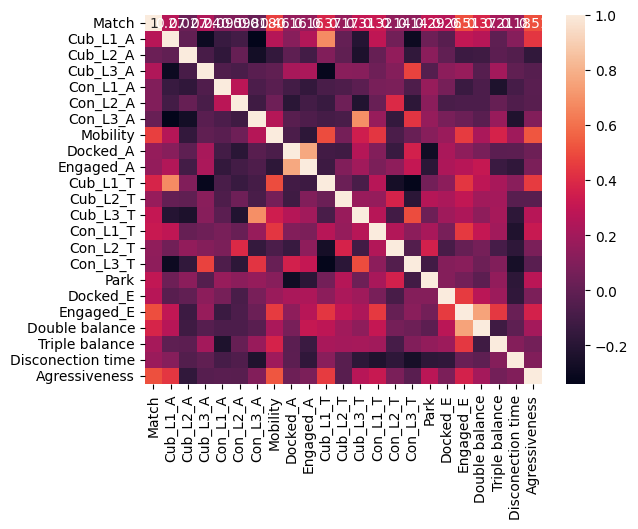

In [22]:
sb.heatmap(df_scouting_by_teams.corr(), annot=True)
mp.show()

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

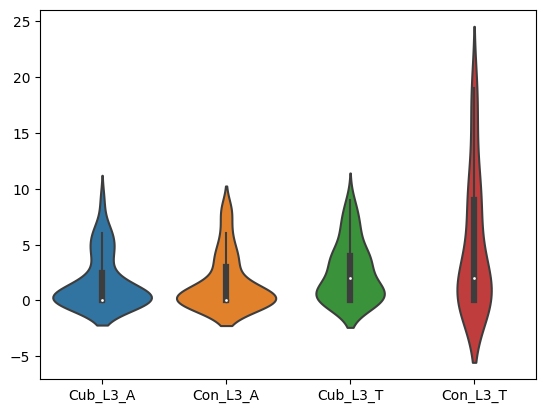

In [23]:
sb.violinplot(df_scouting_by_teams[["Cub_L3_A", "Con_L3_A", "Cub_L3_T", "Con_L3_T"]], annot=True)
mp.show()

In [24]:
df_scouting_by_teams.sort_values(["Cub_L1_T"], ascending=False).head()

Match  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
Team                                                                      
8802    380         5         3         0         0         0         0   
8847    390         7         0         0         0         0         0   
537     307         2         2         1         0         0         0   
2202    387         7         0         0         1         0         0   
7417    198         6         0         0         0         0         0   

      Mobility  Docked_A  Engaged_A  ...  Con_L1_T  Con_L2_T  Con_L3_T  Park  \
Team                                 ...                                       
8802         8         0          0  ...         5         0         1     4   
8847         7         0          0  ...         2         0         0     5   
537          3         1          2  ...         7         0         0     3   
2202         9         3          5  ...        16         7         3     4   
7417         4         1          0  ...         0         1         0     2   

      Docked_E  Engaged_E  Double balance  Triple balance  Disconection time  \
Team                                                                           
8802         3          6               3               3                 16   
8847         2          4               2               1                 40   
537          2          7               4               3                  9   
2202         5         10               7               1                  3   
7417         0          3               1               2                124   

      Agressiveness  
Team                 
8802             13  
8847             24  
537              12  
2202             21  
7417             12  

[5 rows x 23 columns]

In [25]:
df_scouting_sort_team.head()

Match  Team  Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
0      4    93         0         0         0         0         0         1   
1     13    93         0         0         1         0         0         0   
2     29    93         0         0         1         0         0         0   
3     29    93         0         0         0         0         0         1   
4     35    93         0         0         1         0         0         0   

   Mobility  Docked_A  ...  Con_L2_T  Con_L3_T  Park  Docked_E  Engaged_E  \
0         1         0  ...         0         1     1         0          0   
1         0         0  ...         2         2     0         0          1   
2         1         0  ...         2         2     1         1          1   
3         1         0  ...         2         1     1         0          1   
4         1         0  ...         0         0     0         0          1   

   Double balance  Triple balance  Disconection time  Agressiveness  Score_ind  
0               0               0                  0              1         25  
1               1               0                  0              1         49  
2               0               1                  0              2         43  
3               0               1                  0              1         32  
4               1               0                  0              3         29  

[5 rows x 25 columns]

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be r

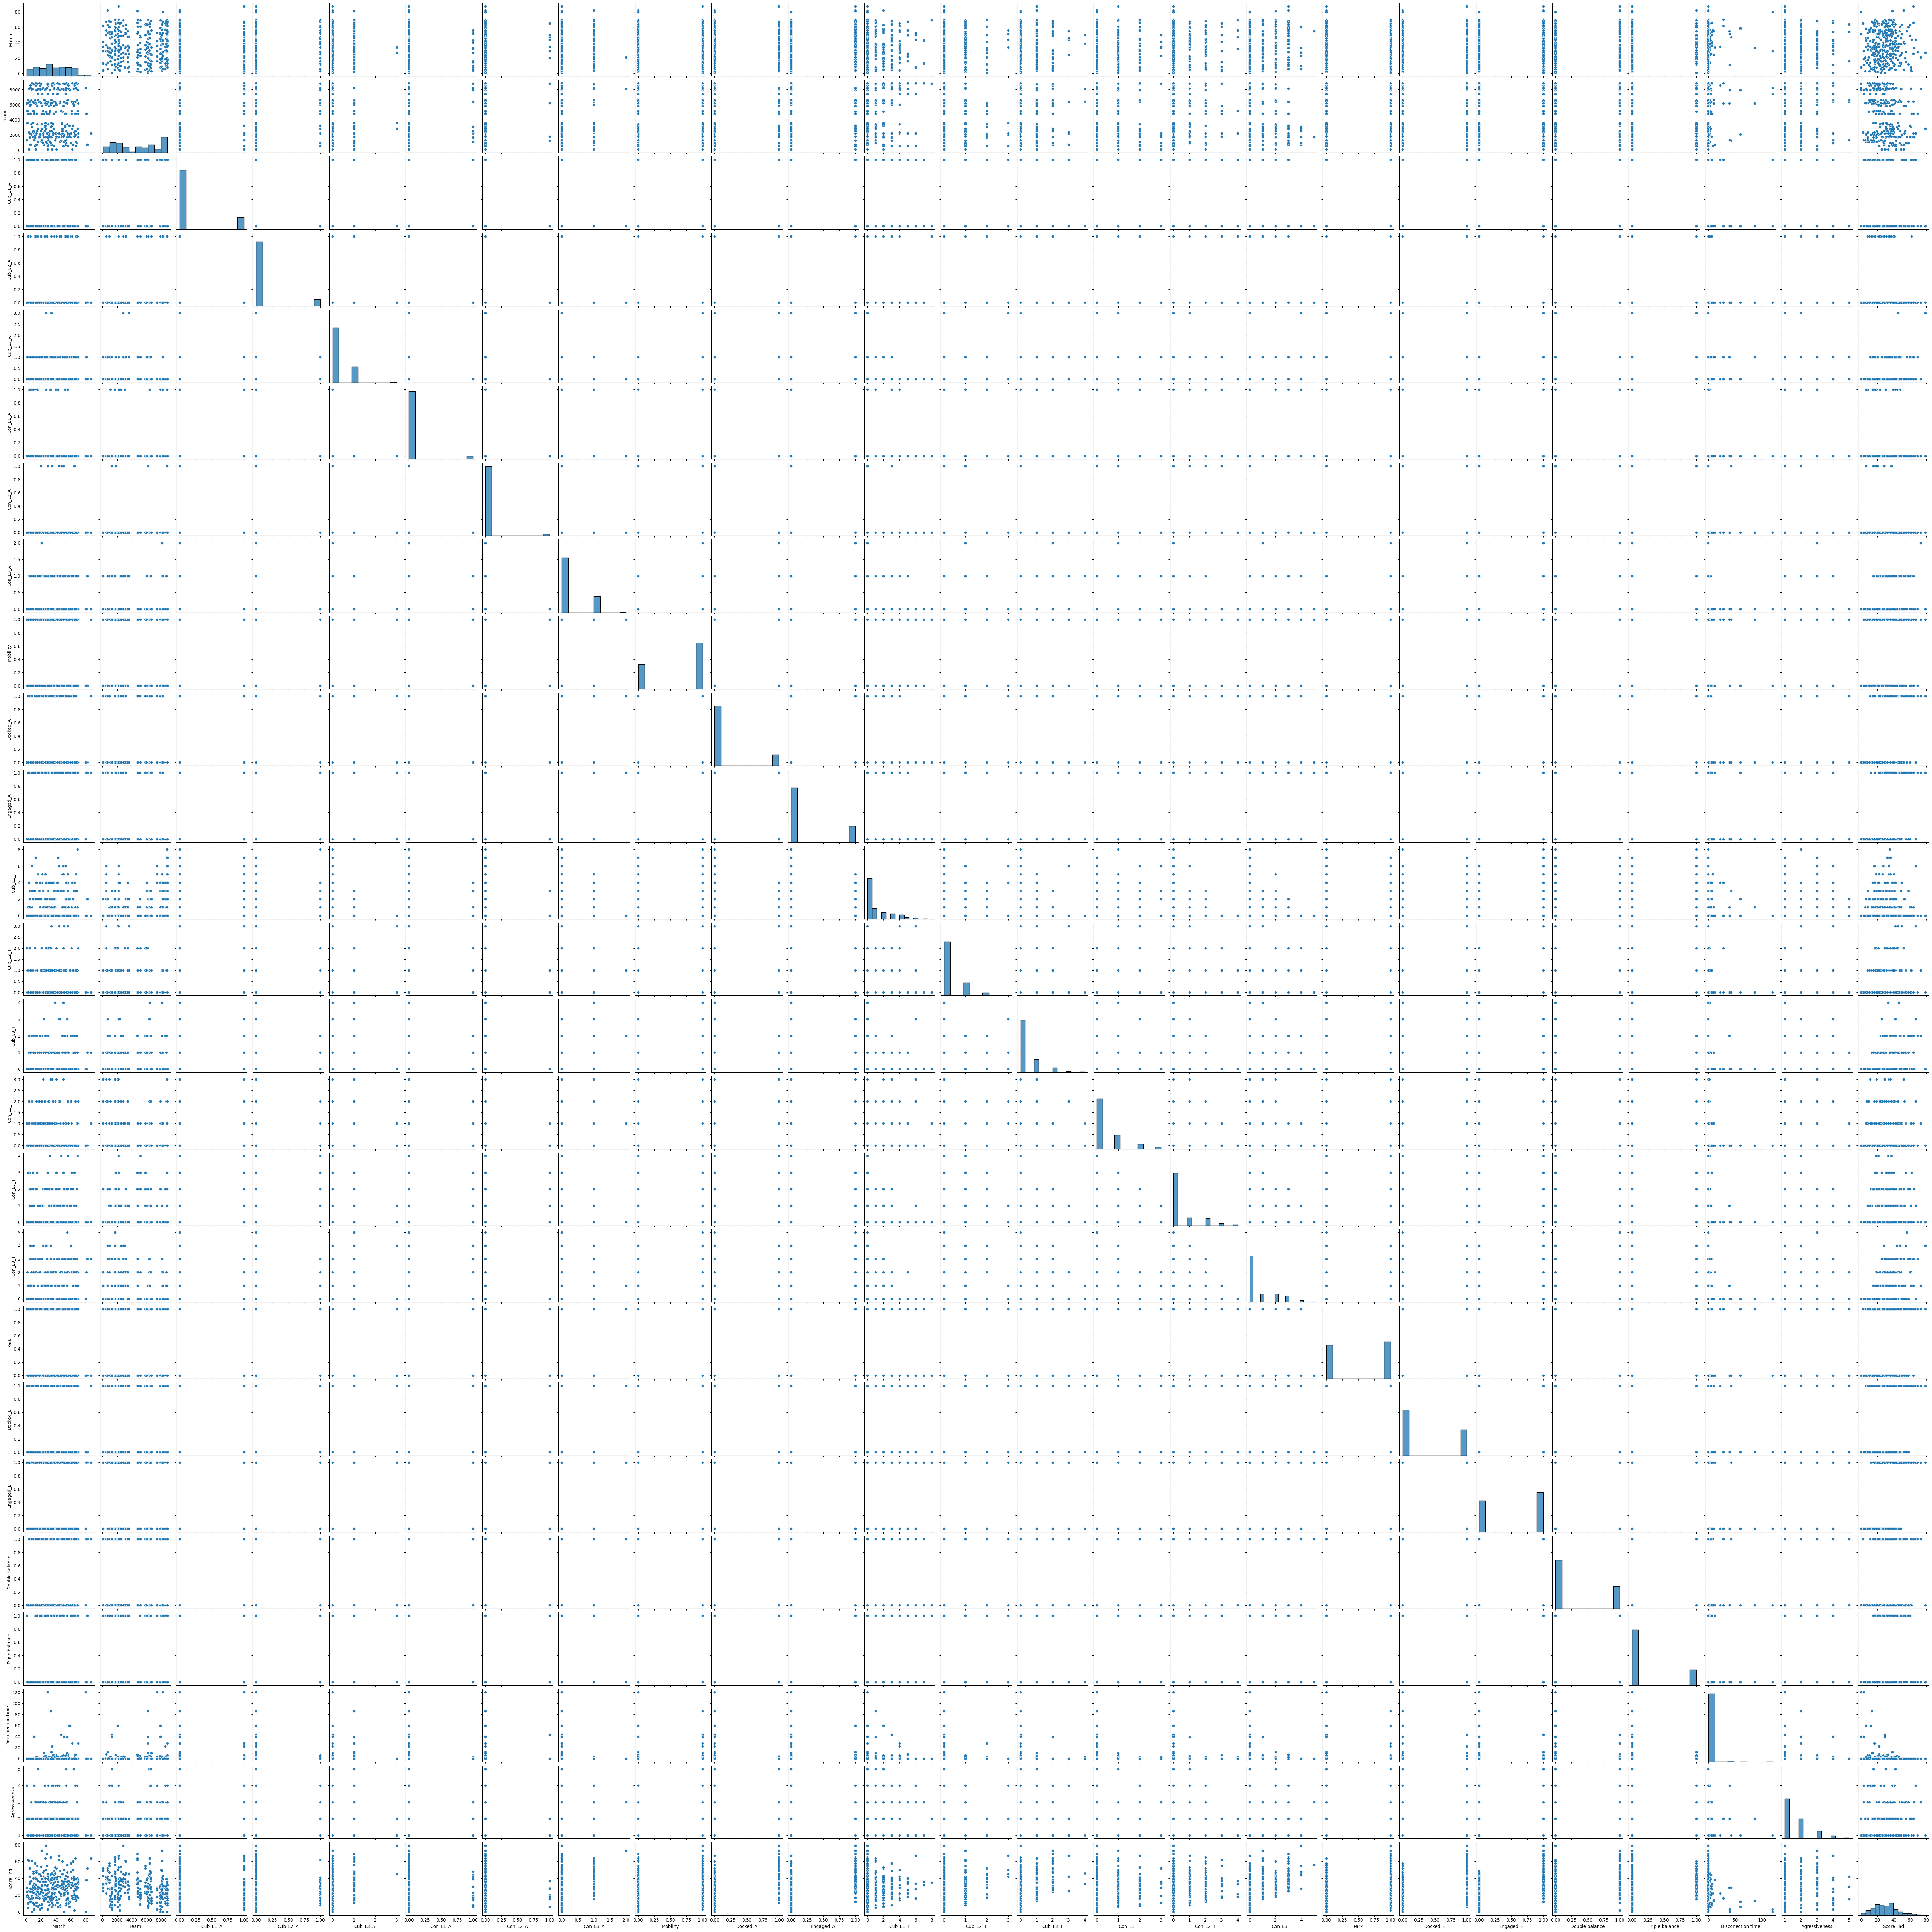

In [46]:
sb.pairplot(df_scouting_sort_team)

In [26]:
train_data = df_scouting_sort_team[["Match", "Team", "Score_ind"]]
train_data

Match  Team  Score_ind
0        4    93         25
1       13    93         49
2       29    93         43
3       29    93         32
4       35    93         29
..     ...   ...        ...
314     54  8847         10
315     54  8847         14
316     62  8847         16
317     67  8847         26
309     13  8847         32

[322 rows x 3 columns]

In [27]:
listTeam = train_data["Team"].unique()
listTeam

array([  93,  537,  706,  930, 1091, 1259, 1306, 1675, 1714, 1732, 1792,
       2062, 2077, 2194, 2202, 2358, 2506, 2512, 2830, 3067, 3197, 3418,
       3596, 4786, 4787, 5096, 5148, 5822, 6017, 6160, 6223, 6381, 6421,
       6574, 6643, 7417, 7900, 7915, 8029, 8096, 8122, 8188, 8531, 8701,
       8802, 8803, 8847], dtype=int64)

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be r

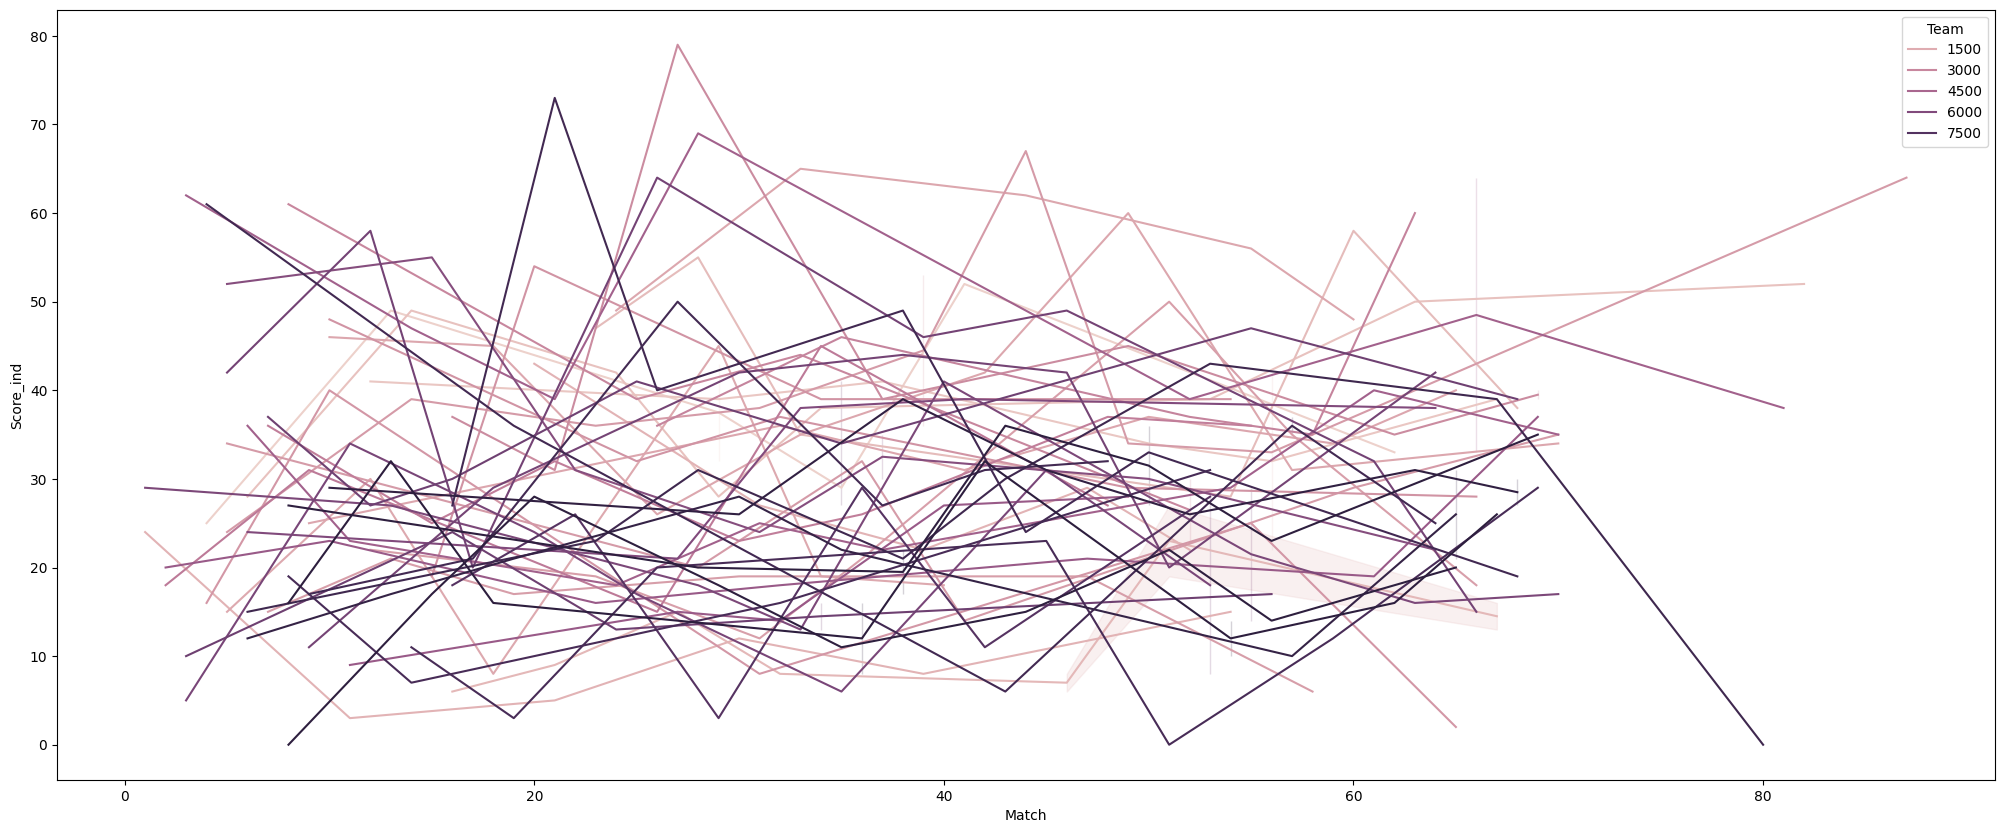

In [30]:
fig = plt.subplots(figsize=(25, 10))
sb.lineplot(data=train_data, x="Match", y="Score_ind", hue="Team")
mp.show()

In [42]:
temp_team = train_data[train_data["Team"] == 6017]
temp_team["Score_ind"].std

<bound method Series.std of 180    24
181    21
182    38
183    39
184    38
Name: Score_ind, dtype: int64>

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

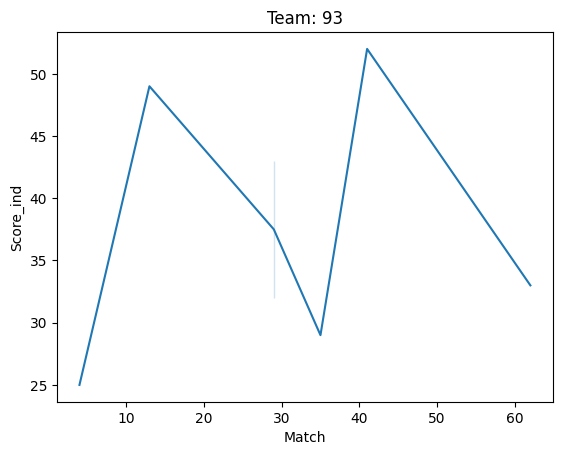

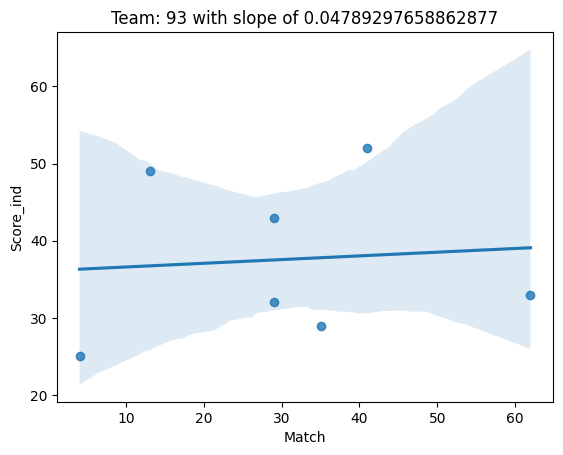

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

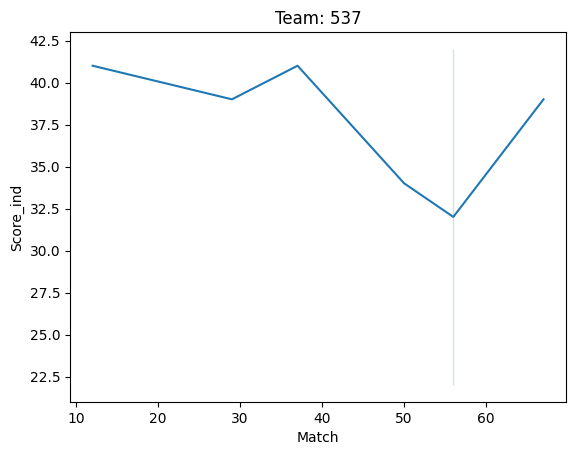

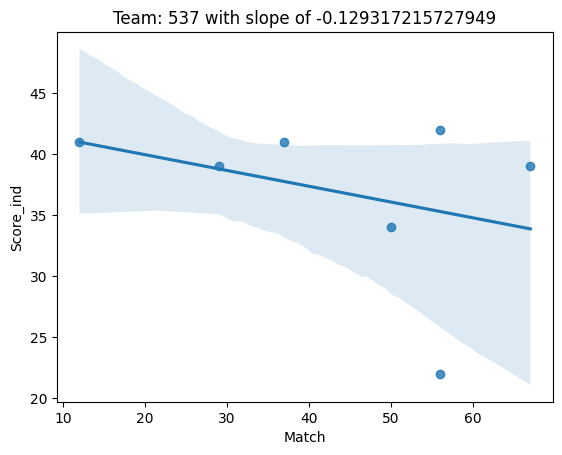

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

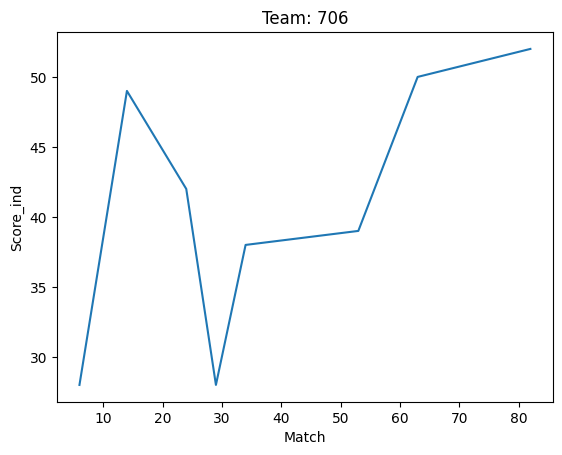

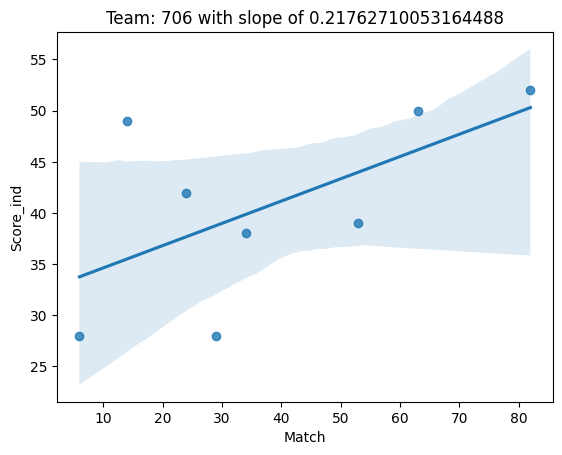

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

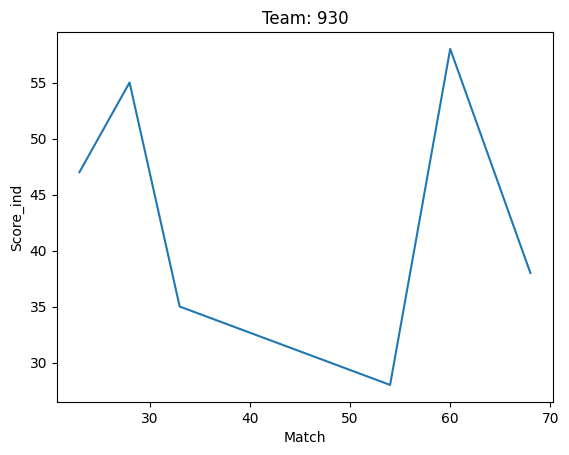

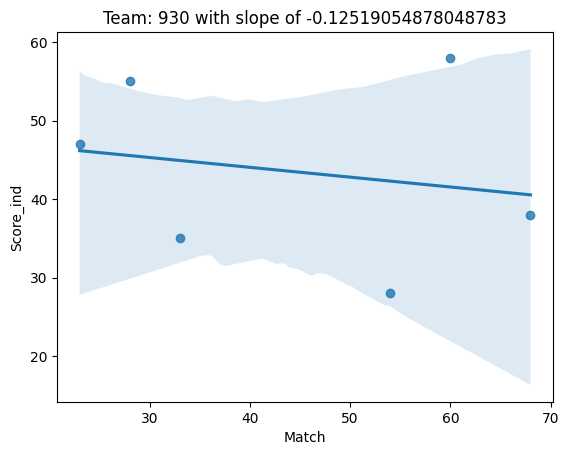

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

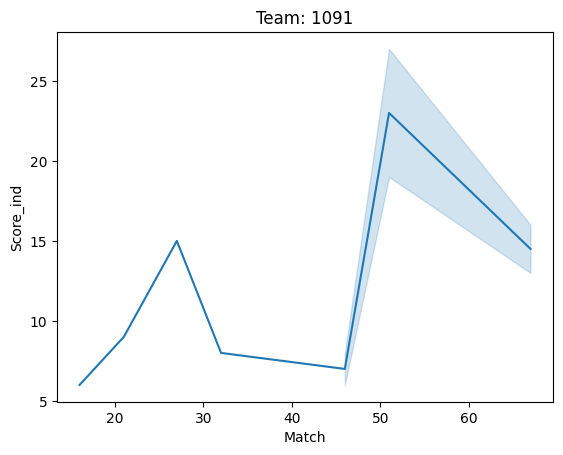

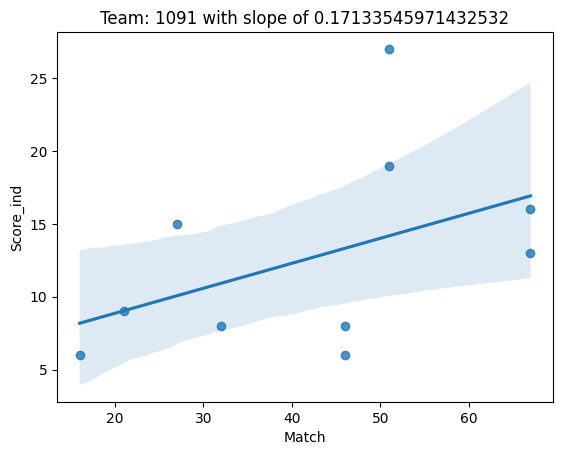

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

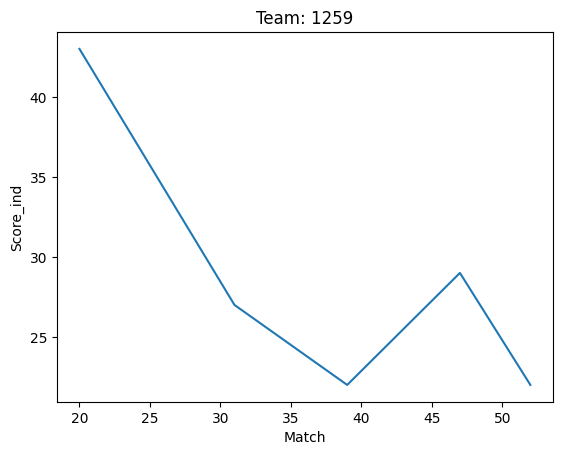

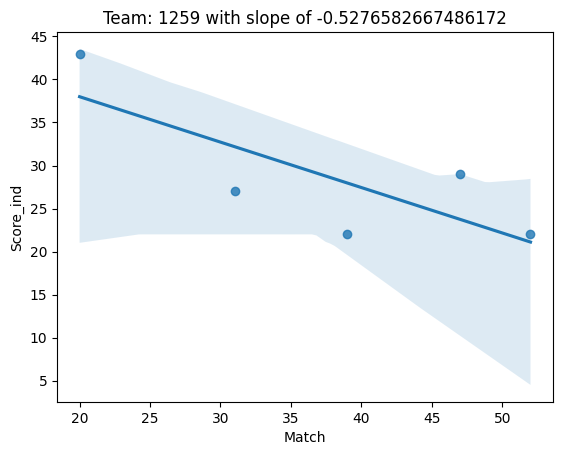

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

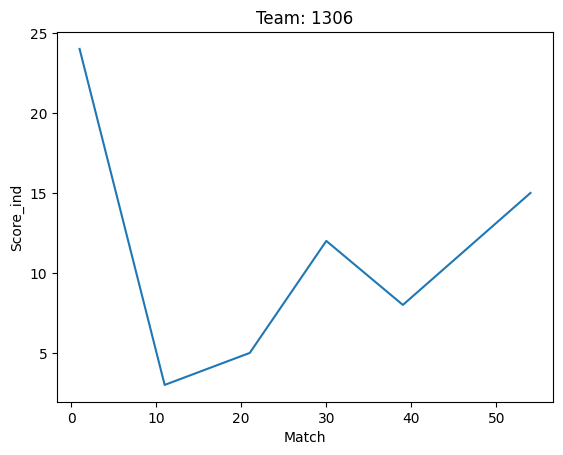

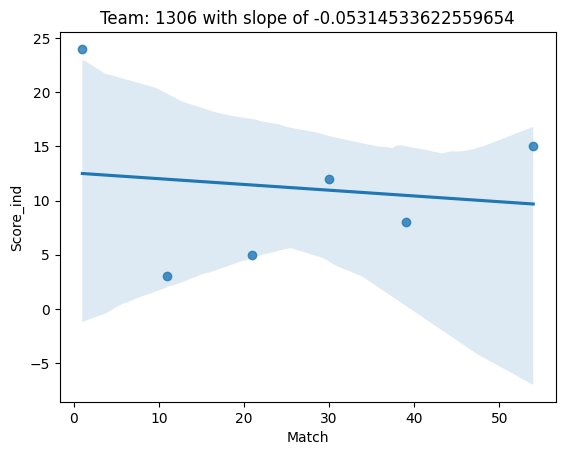

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

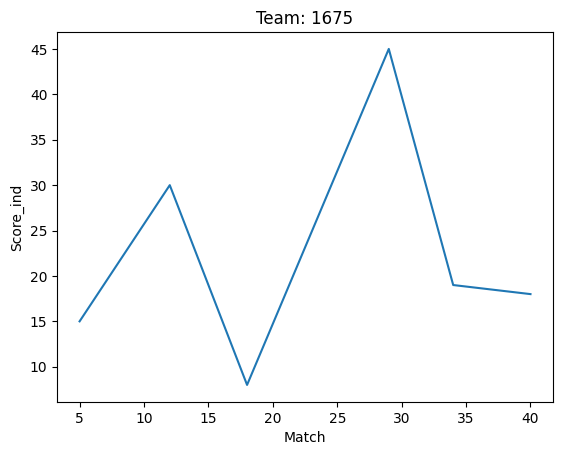

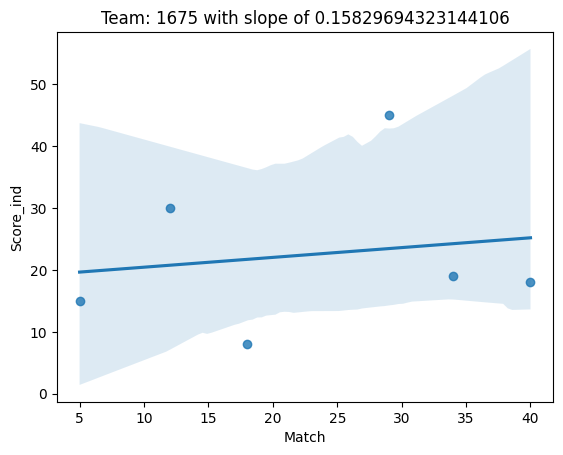

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

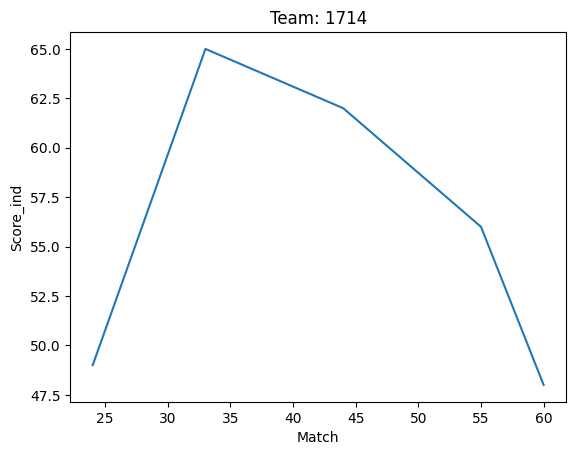

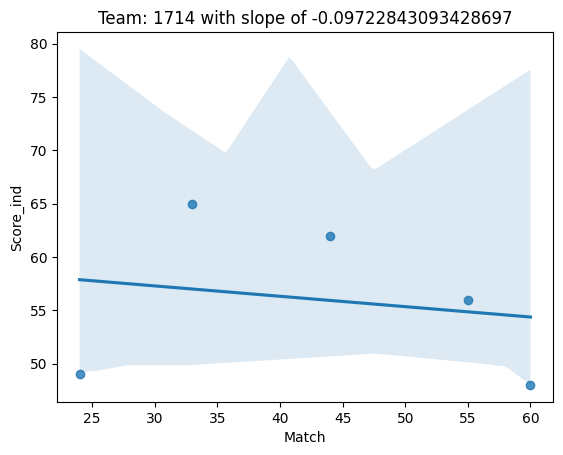

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

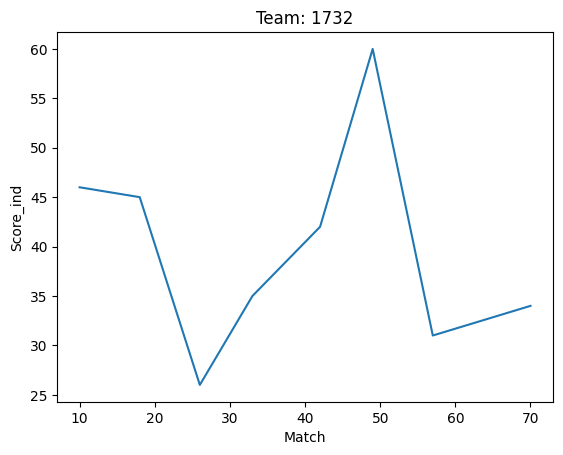

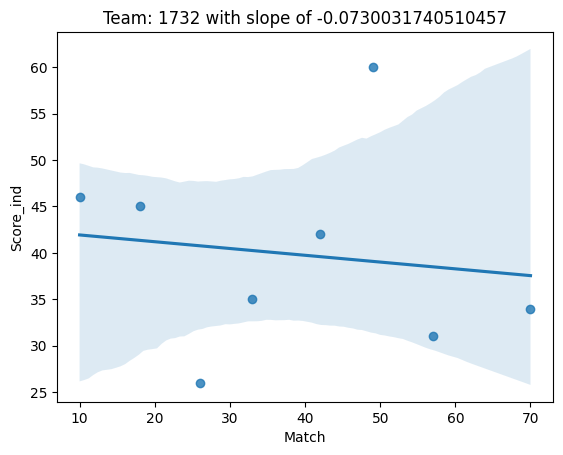

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

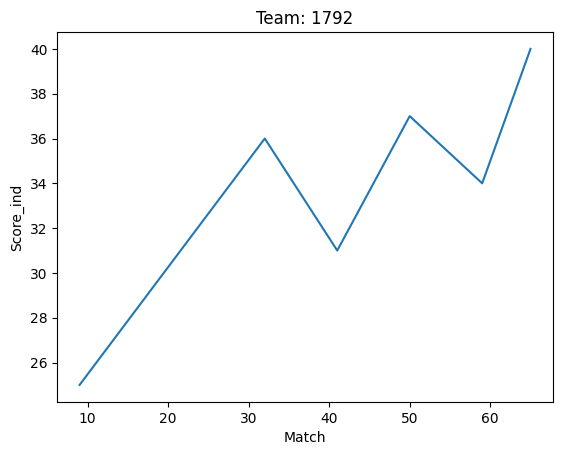

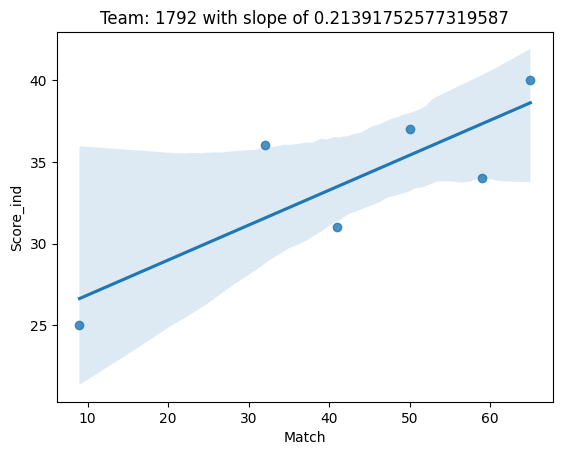

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

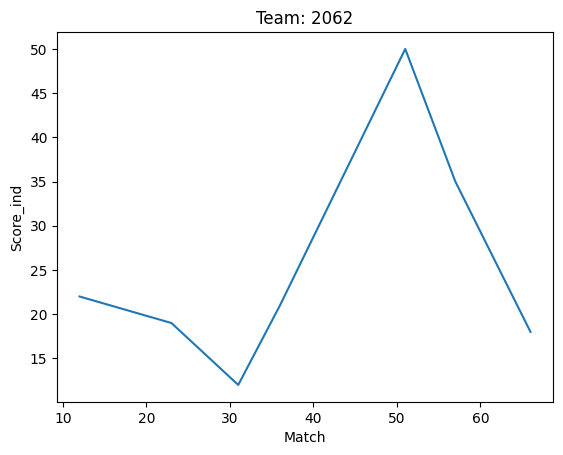

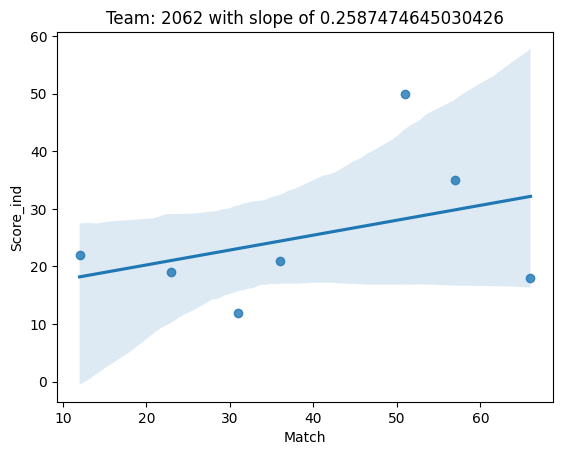

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

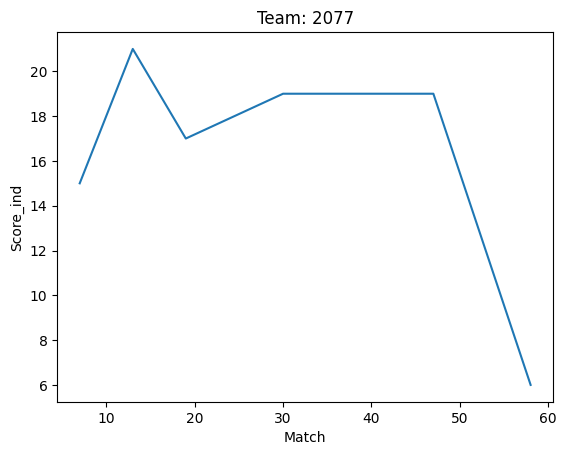

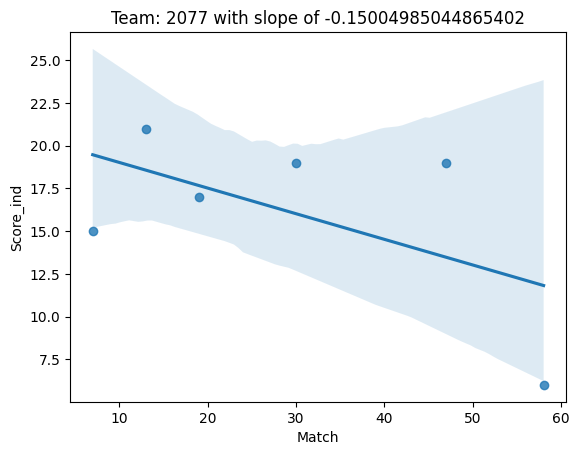

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

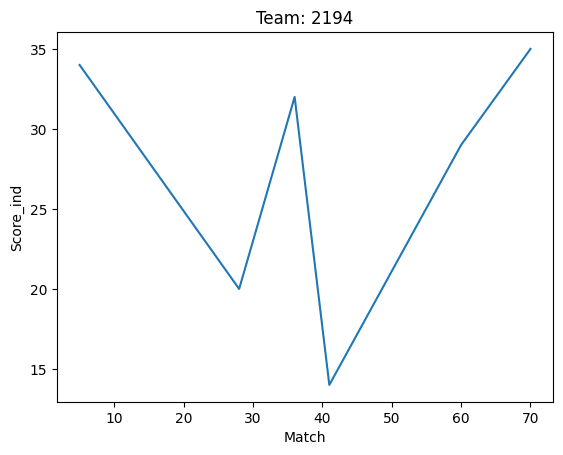

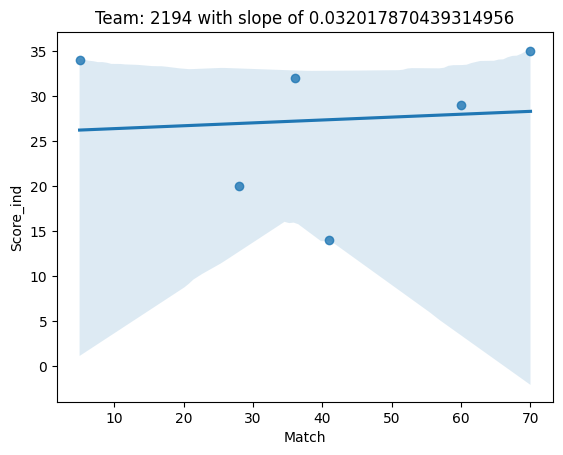

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

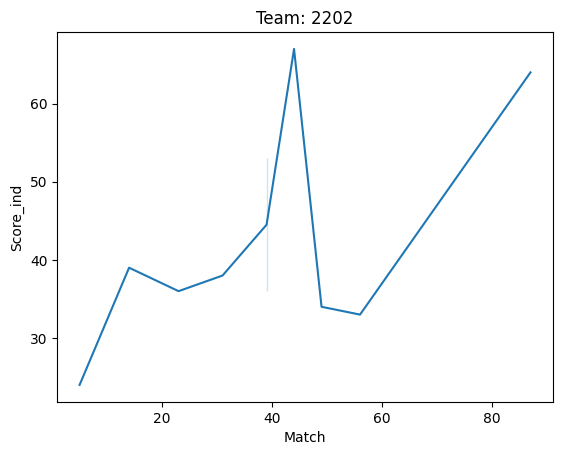

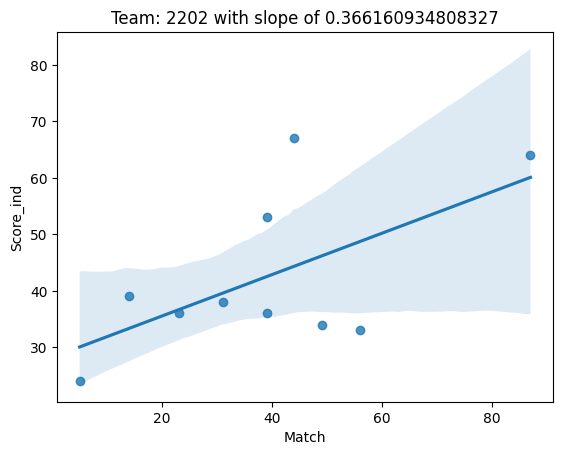

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

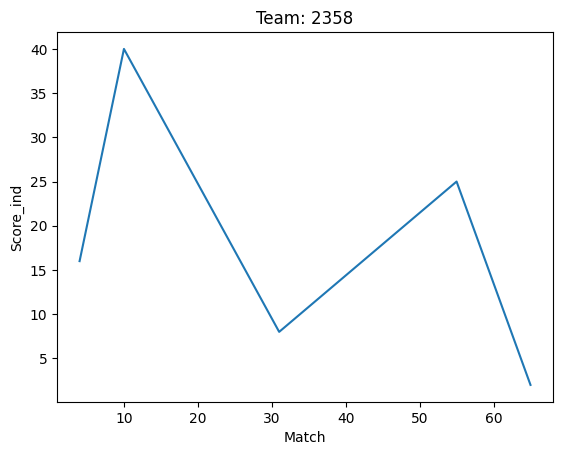

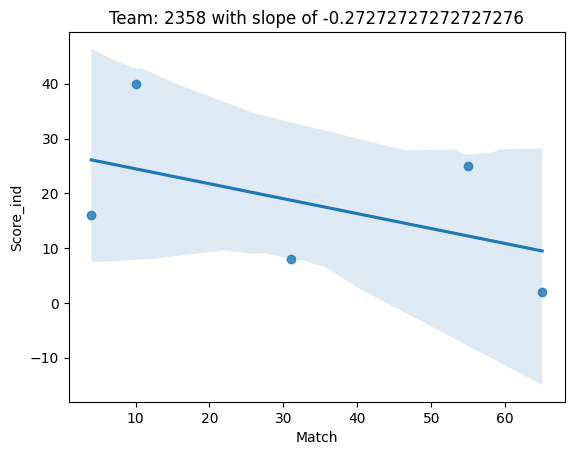

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

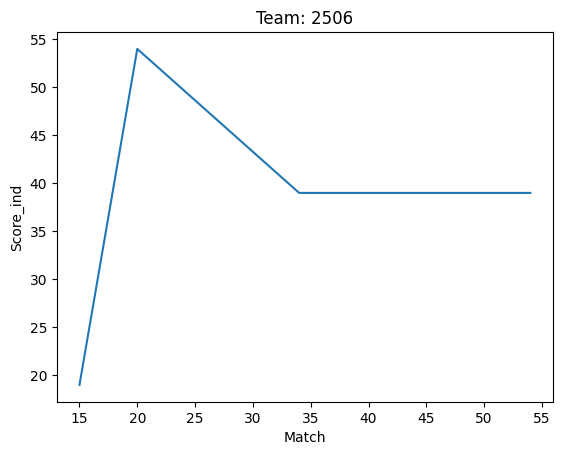

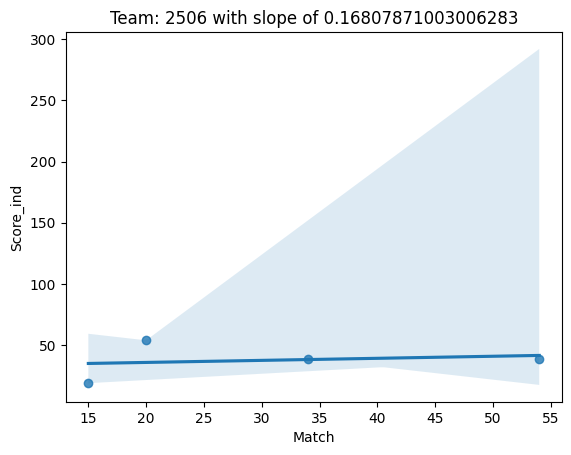

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

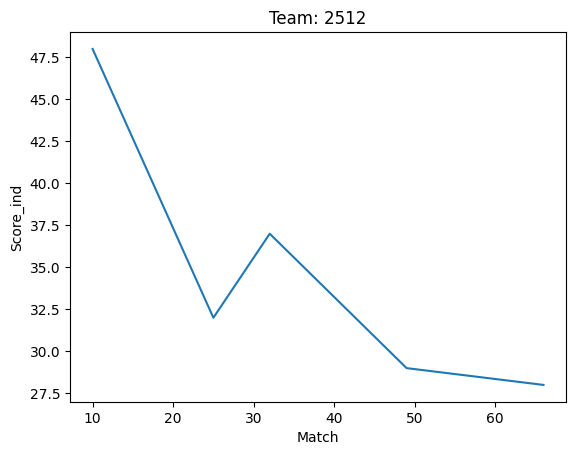

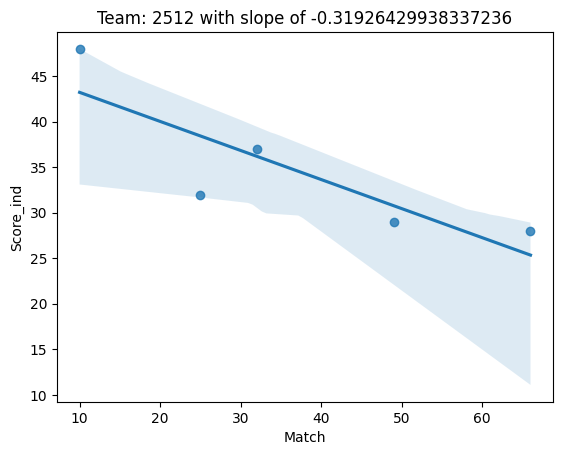

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

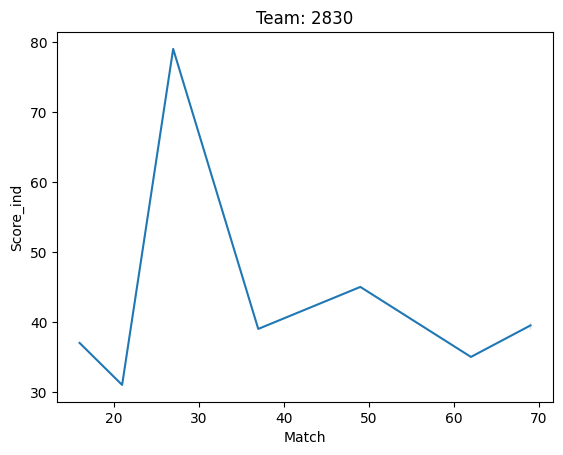

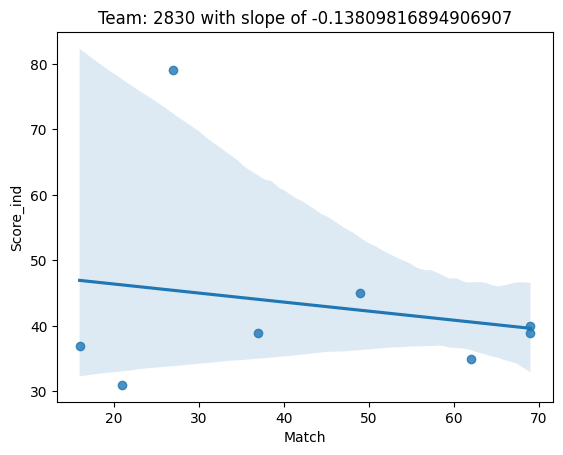

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

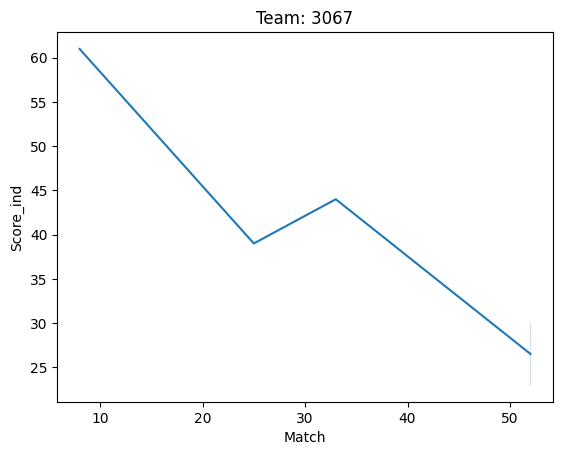

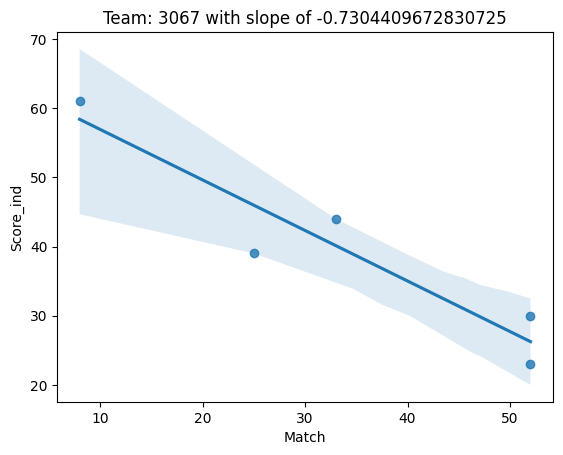

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

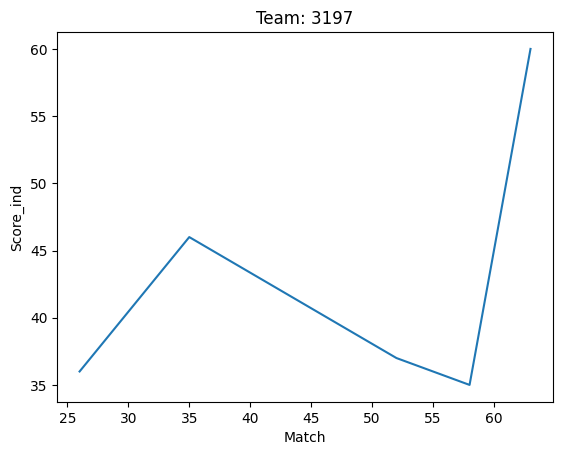

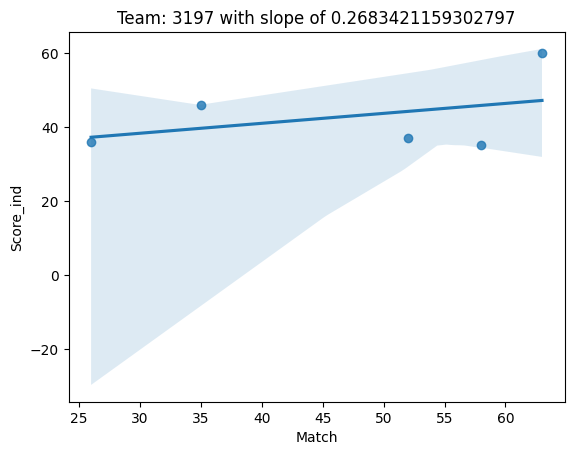

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

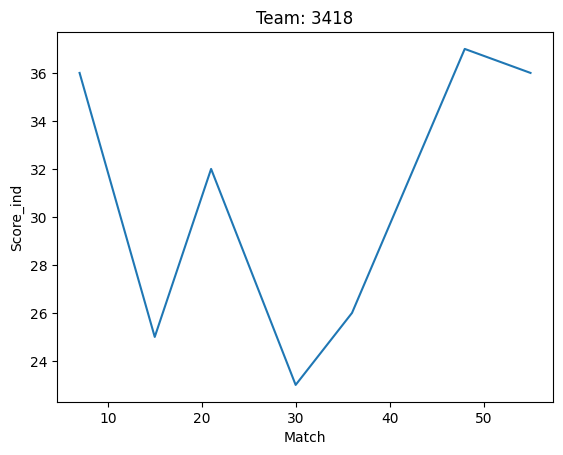

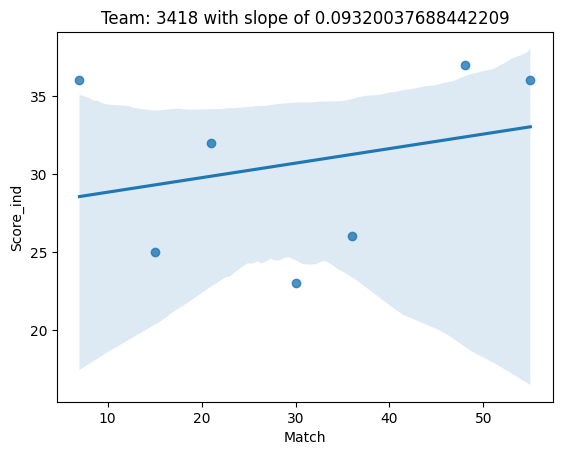

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

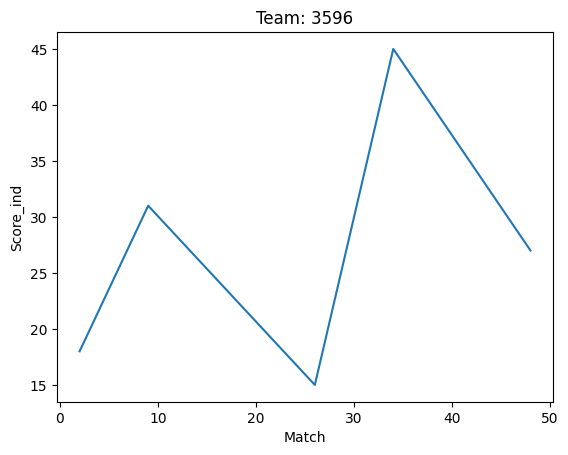

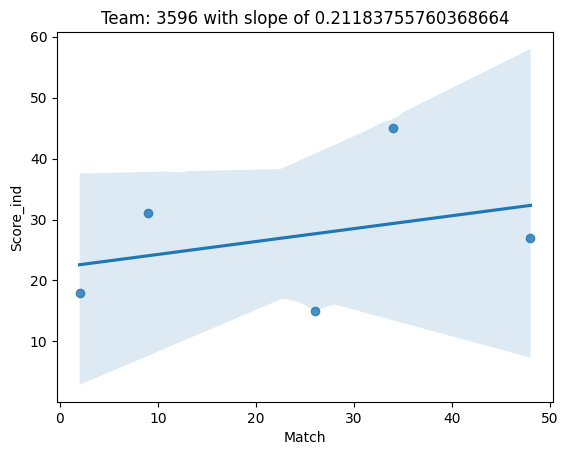

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

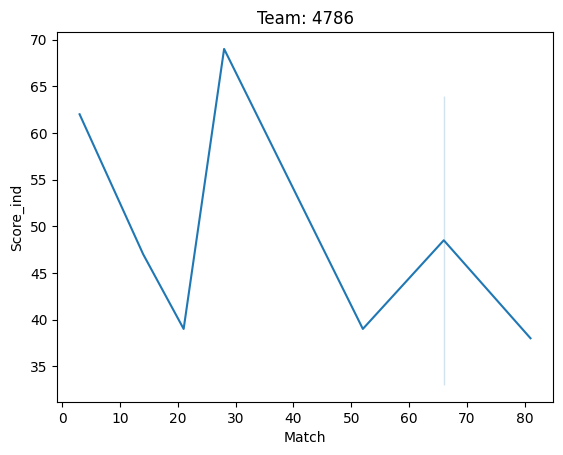

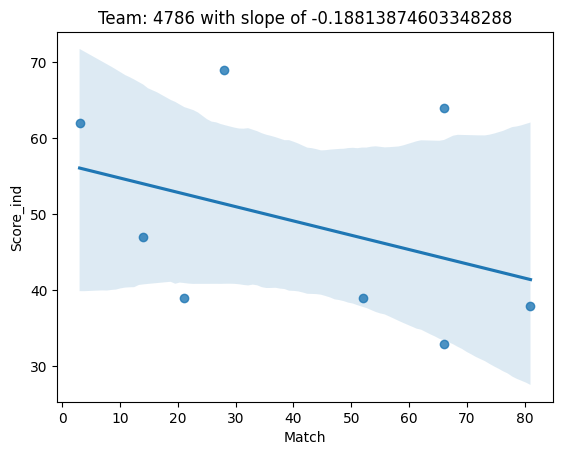

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

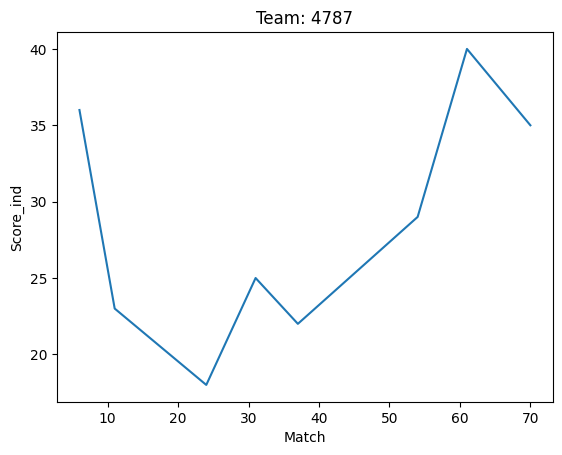

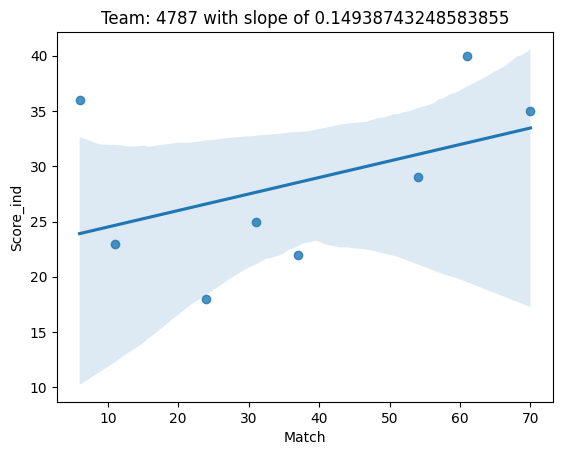

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

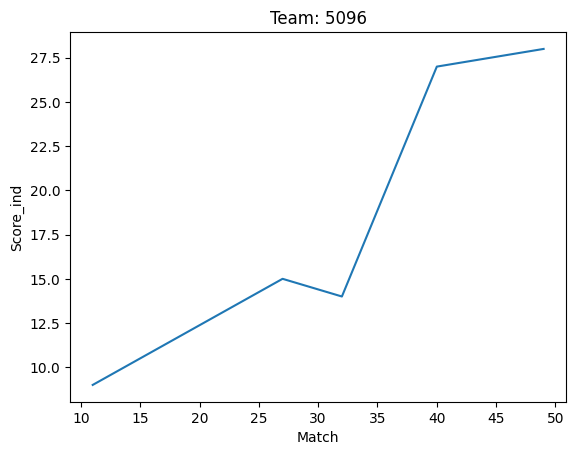

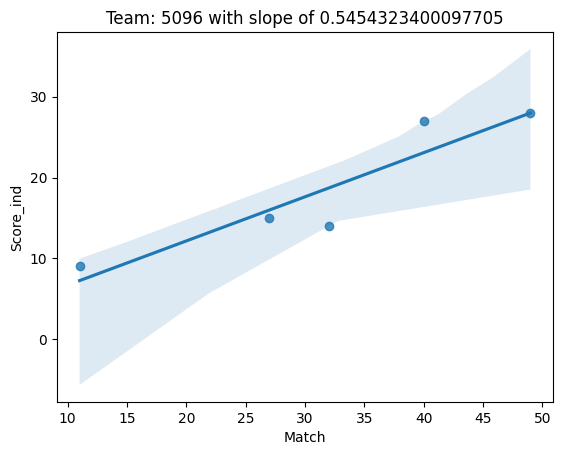

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

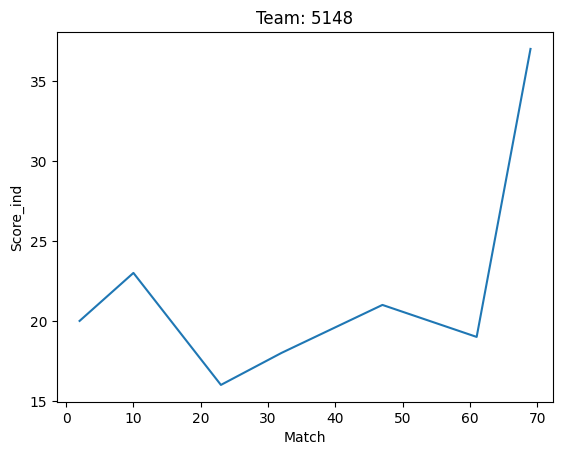

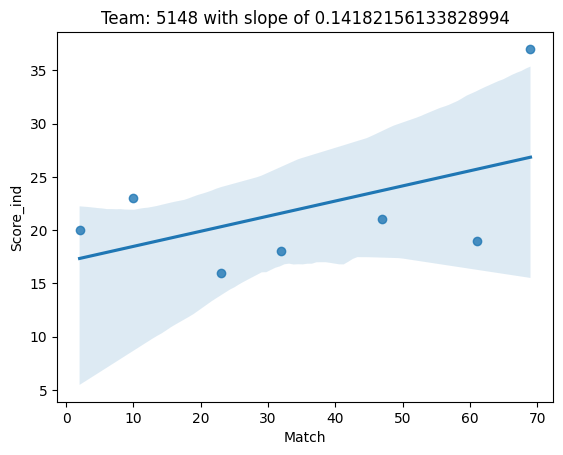

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

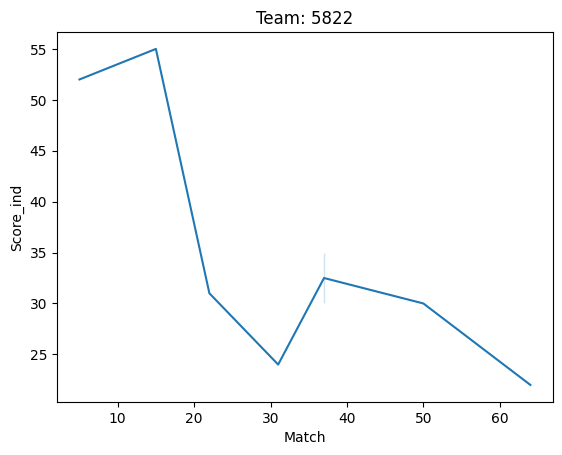

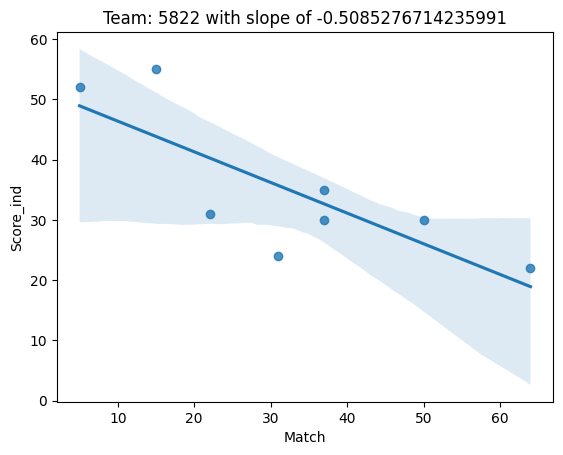

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

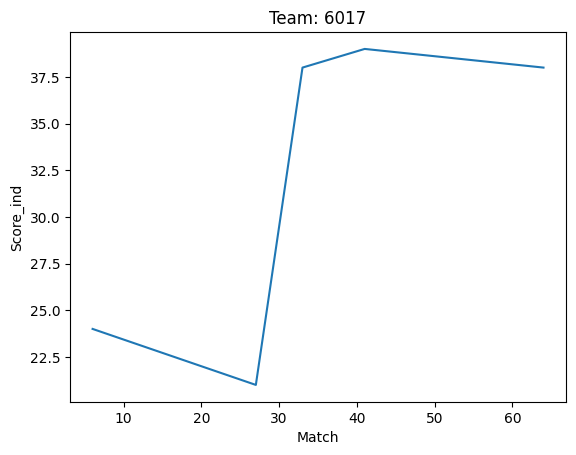

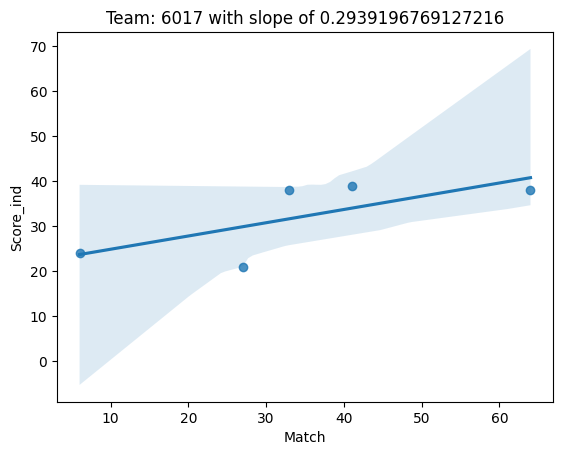

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

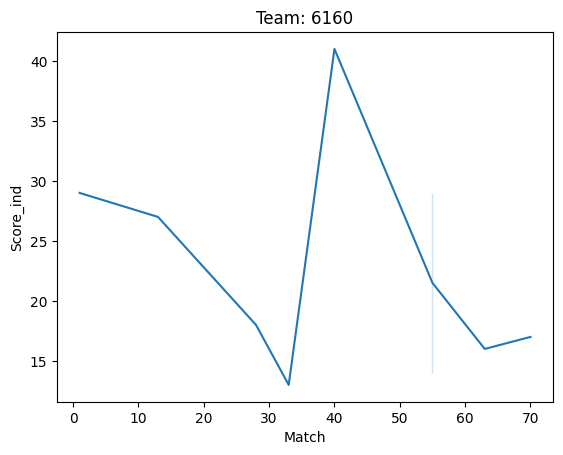

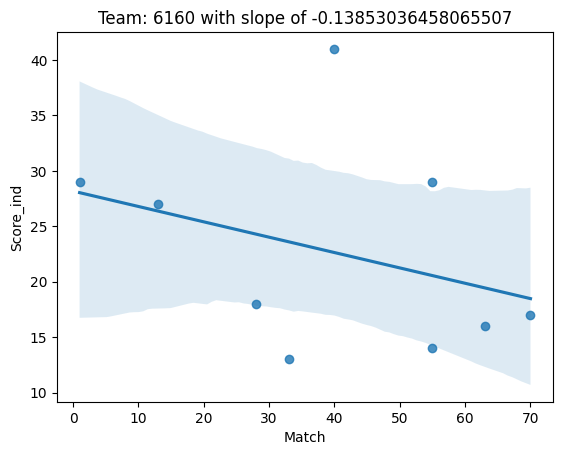

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

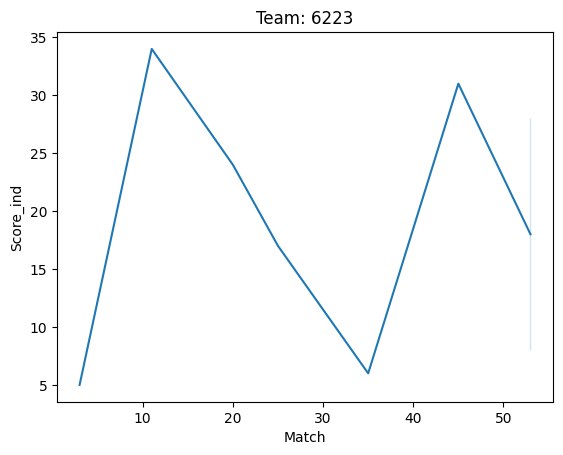

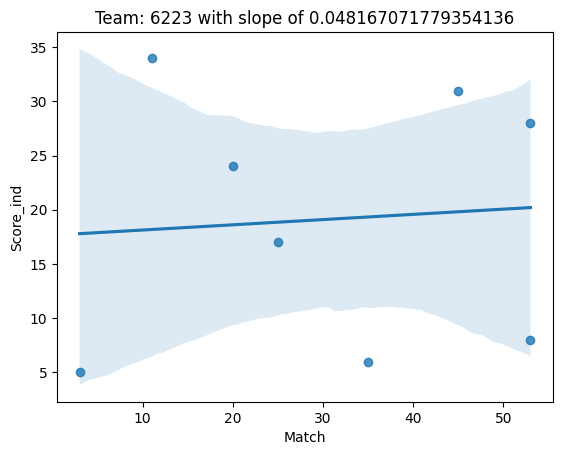

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

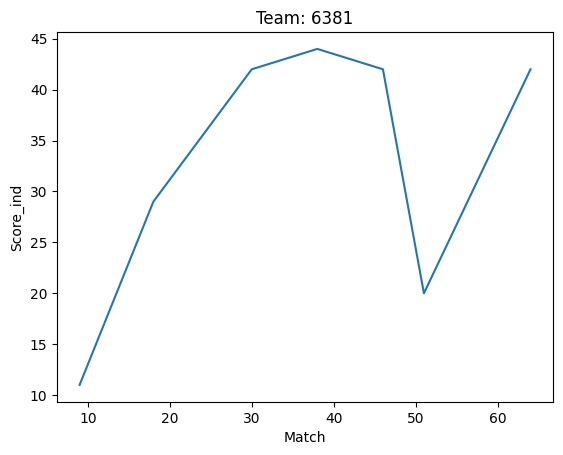

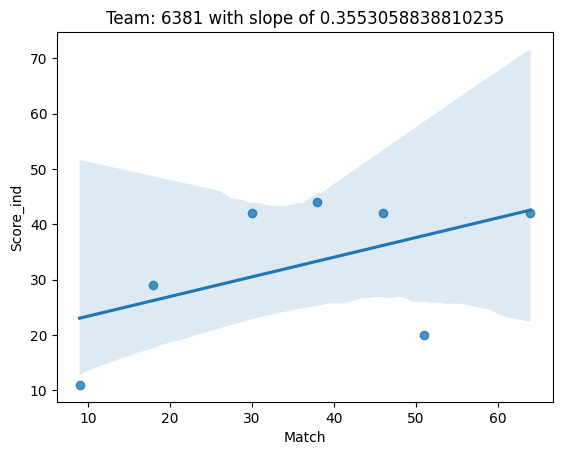

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

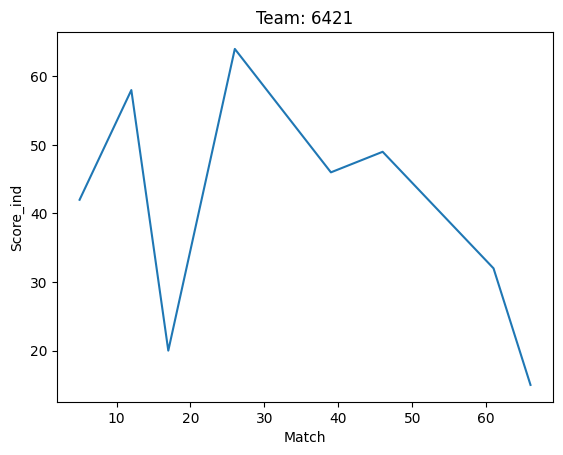

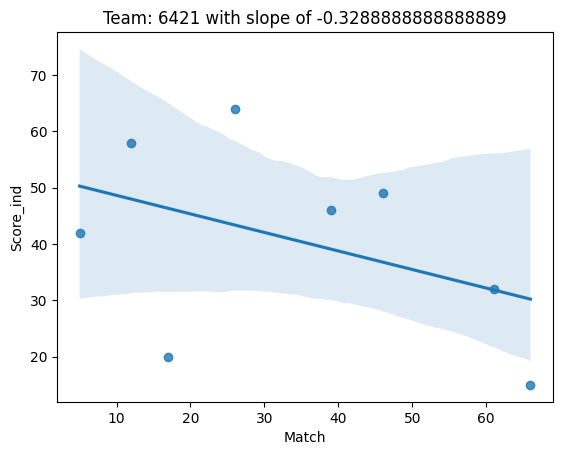

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

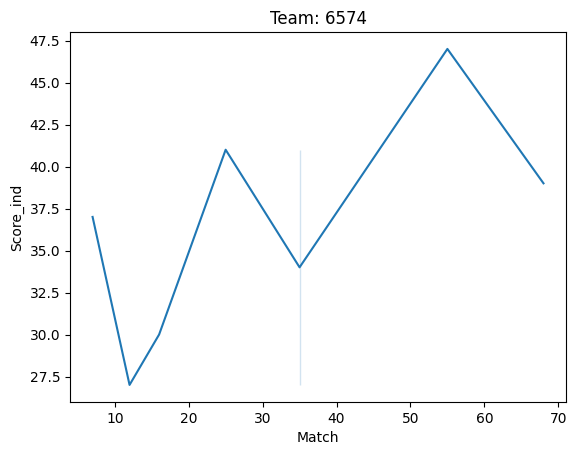

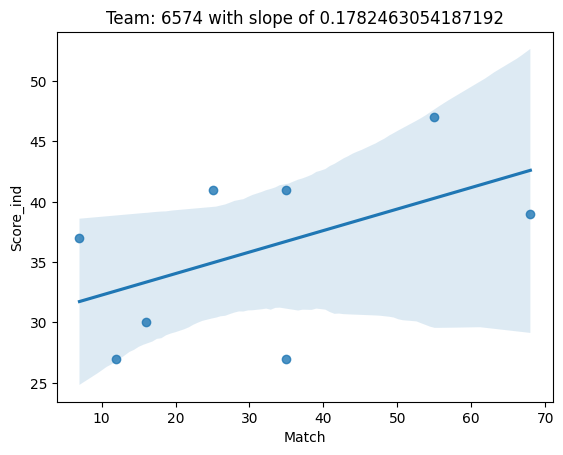

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

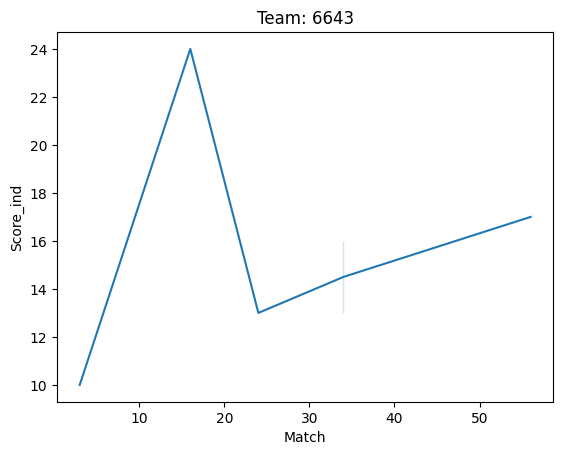

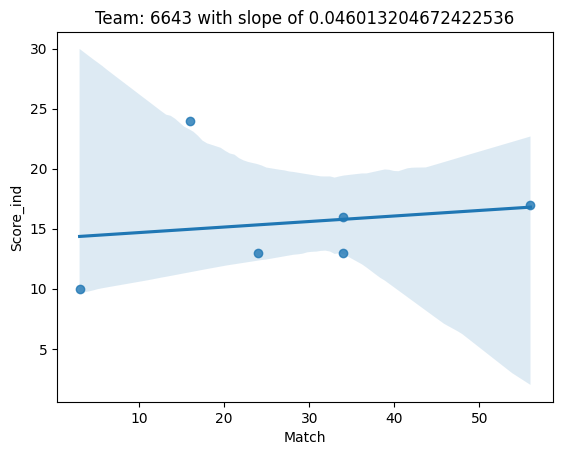

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

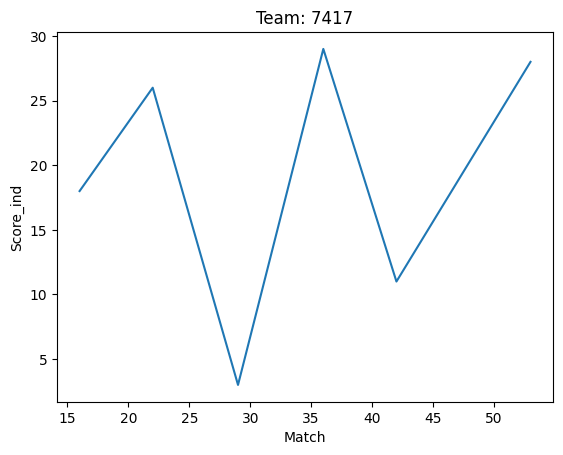

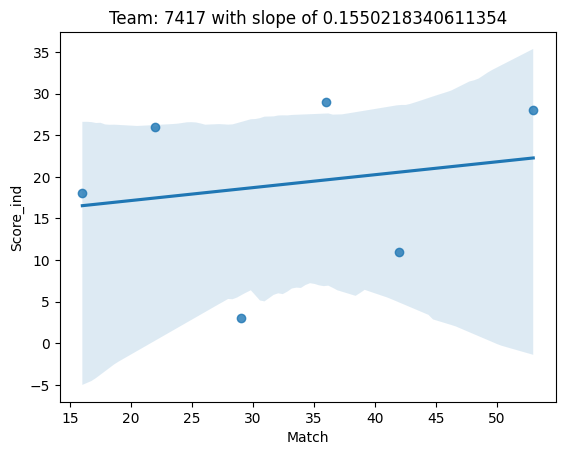

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

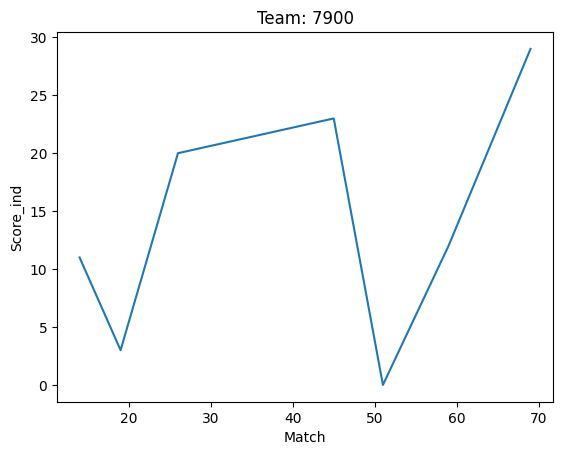

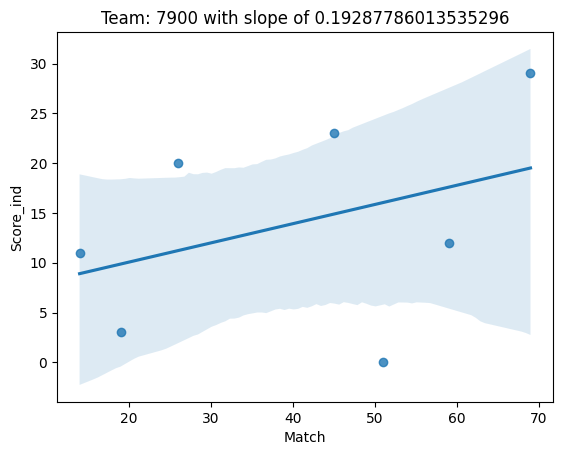

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

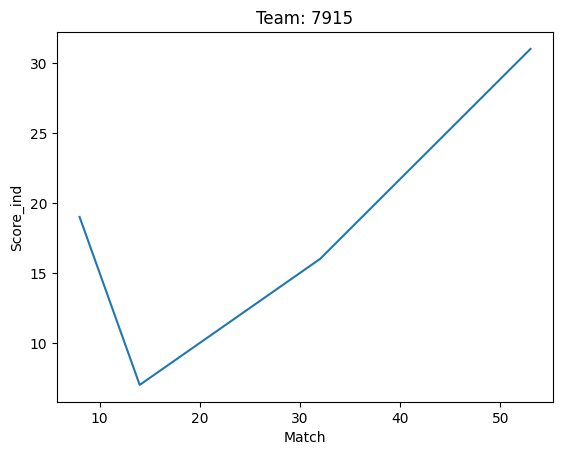

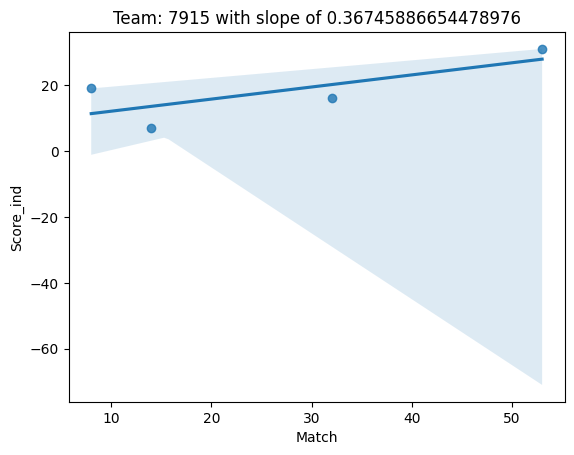

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

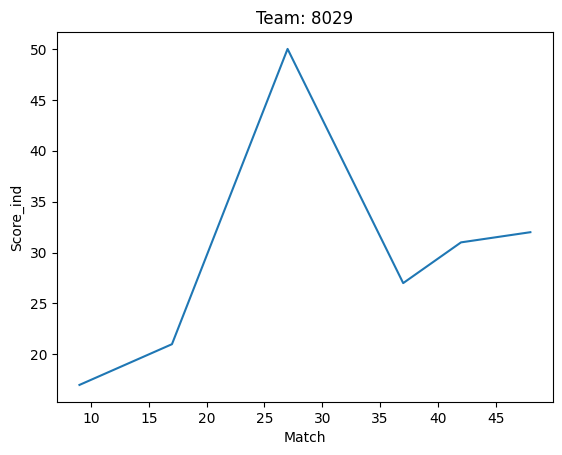

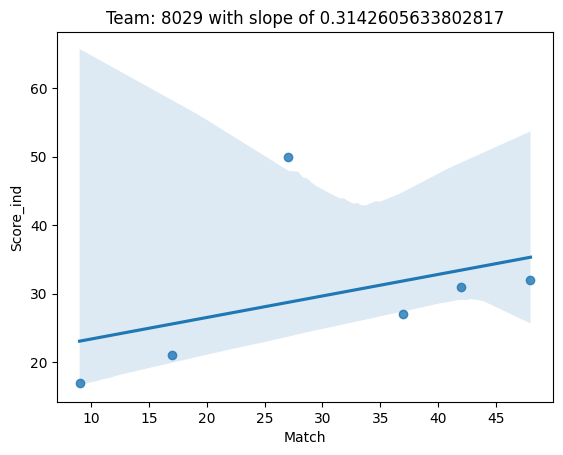

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

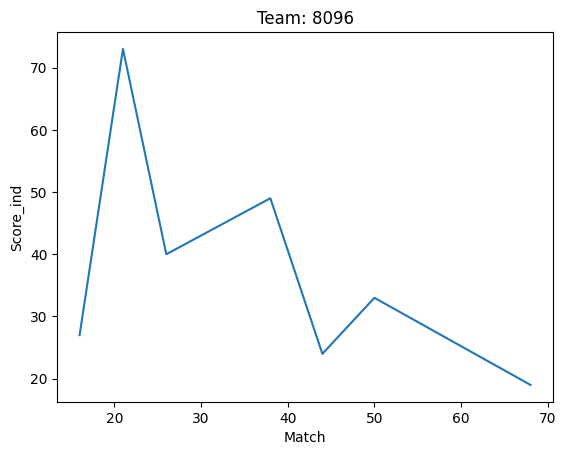

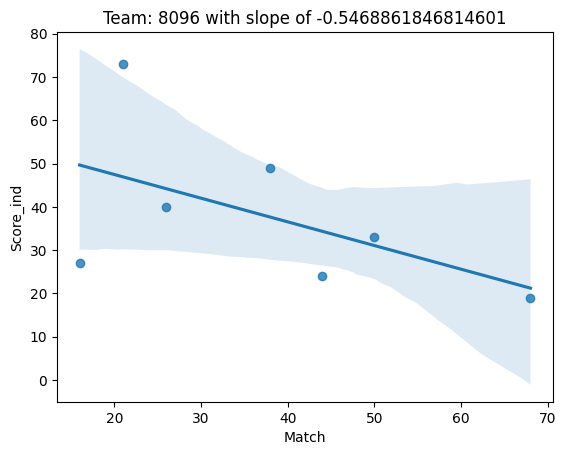

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

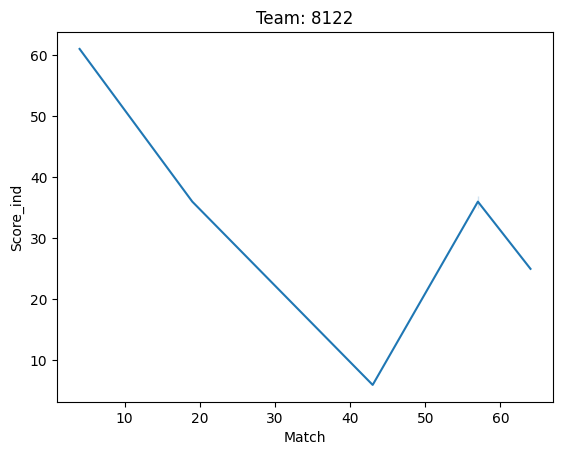

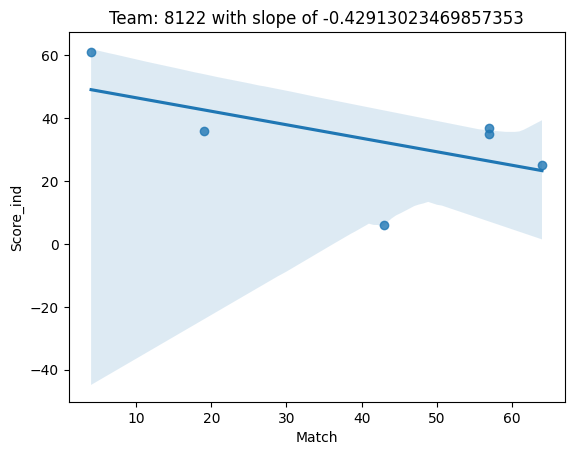

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

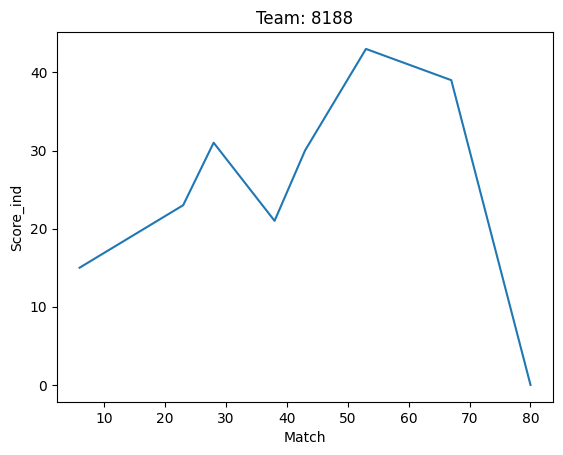

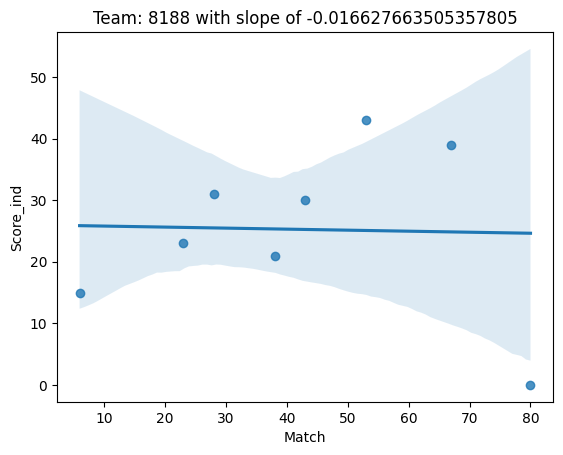

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

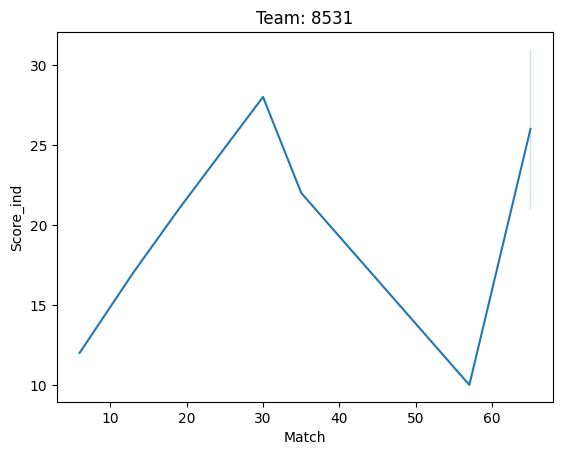

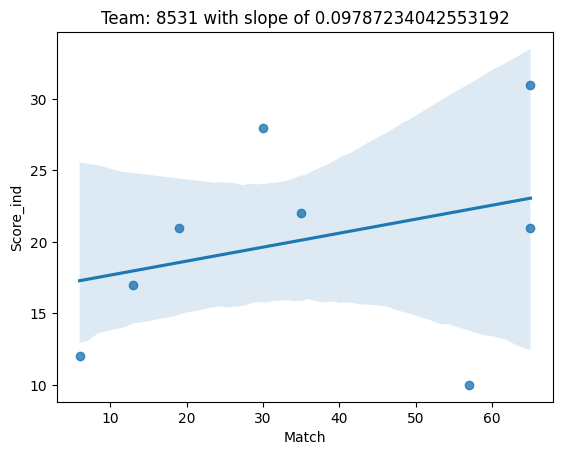

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

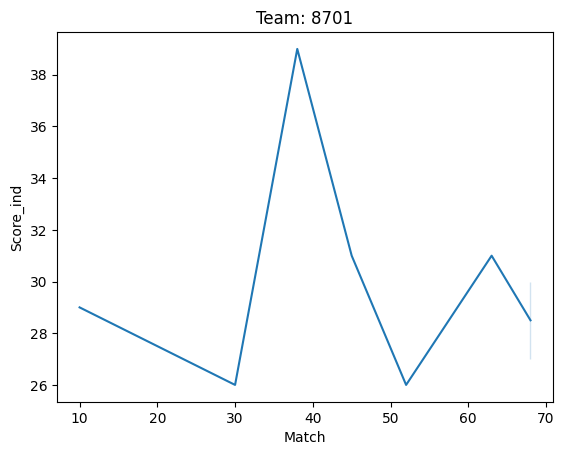

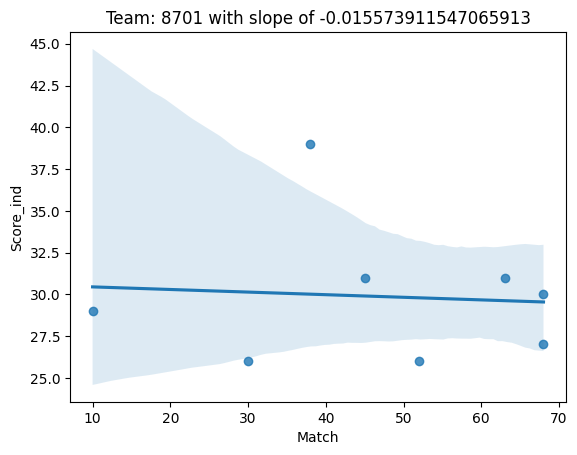

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

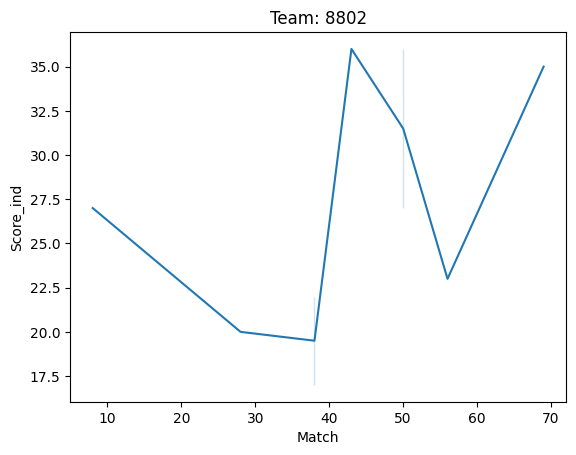

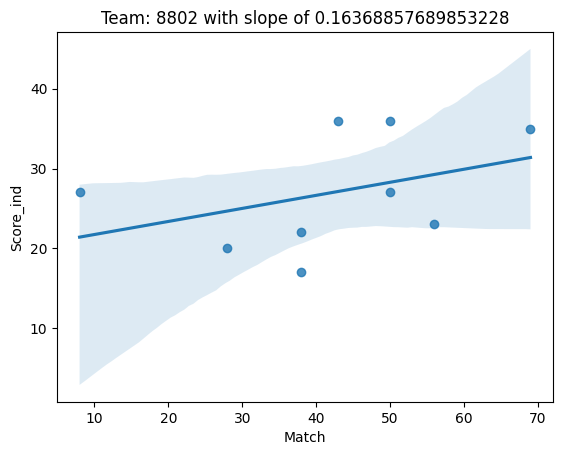

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

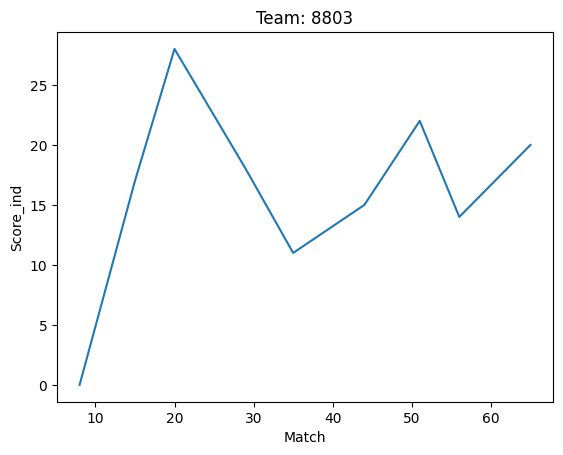

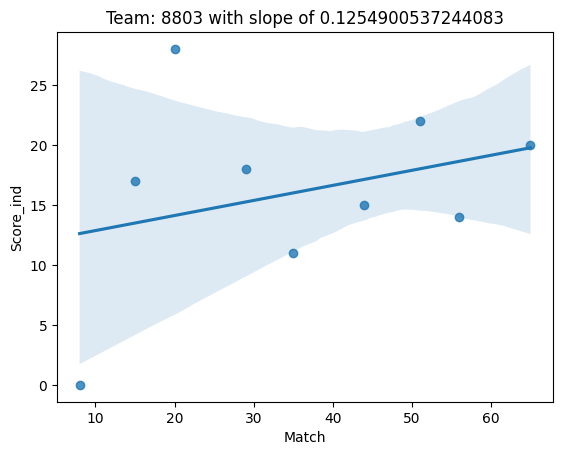

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and

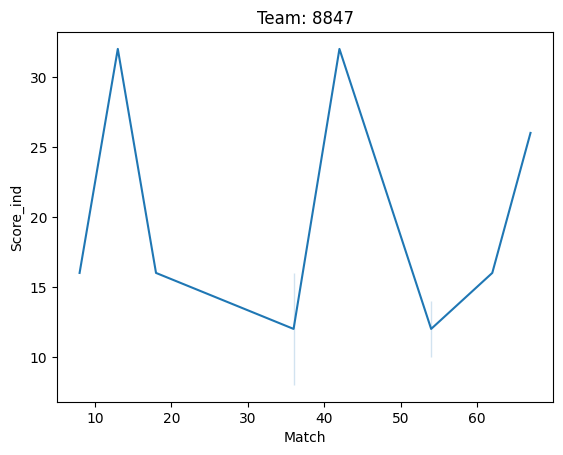

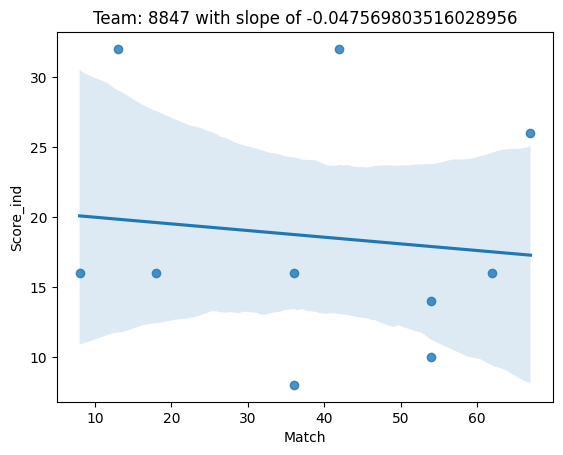

In [43]:
for i in listTeam:
    temp_team = train_data[train_data["Team"] == i]
    sb.lineplot(data=temp_team, x="Match", y="Score_ind").set(title=f"Team: {i}")
    mp.show()
    correlation = temp_team["Score_ind"].corr(temp_team["Match"])
    slope = ((temp_team["Score_ind"].std())/(temp_team["Match"].std())) * correlation
    temp_team = train_data[train_data["Team"] == i]
    sb.regplot(data=temp_team, x="Match", y="Score_ind").set(title=f"Team: {i} with slope of {slope}")
    mp.show()

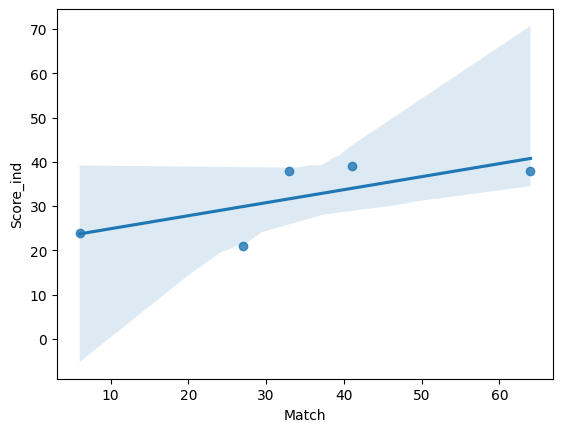

In [204]:
temp_team = train_data[train_data["Team"] == 6017]
sb.regplot(data=temp_team, x="Match", y="Score_ind")
mp.show()

## KMeans

---

In [83]:
scaler = MinMaxScaler()
scale = scaler.fit_transform(df_scouting_by_teams)
df_scale = pd.DataFrame(scale, columns= df_scouting_by_teams.columns)
df_scale.head()

Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  Mobility  \
0  0.285714       0.0  0.444444       0.0       0.0     0.250  0.428571   
1  0.285714       0.4  0.111111       0.0       0.0     0.000  0.142857   
2  0.000000       0.0  0.222222       0.0       0.0     0.500  0.285714   
3  0.000000       0.2  0.111111       0.0       0.0     0.625  0.571429   
4  0.000000       0.0  0.444444       1.0       0.0     0.000  0.000000   

   Docked_A  Engaged_A  Cub_L1_T  ...  Con_L1_T  Con_L2_T  Con_L3_T  Park  \
0      0.25      0.250  0.048780  ...    0.5625  0.421053  0.473684   0.8   
1      0.25      0.250  0.658537  ...    0.4375  0.000000  0.000000   0.4   
2      0.25      0.375  0.048780  ...    0.1250  0.105263  1.000000   0.2   
3      0.50      0.000  0.024390  ...    0.2500  0.210526  1.000000   0.4   
4      0.00      0.000  0.073171  ...    0.1250  0.210526  0.000000   1.0   

   Docked_E  Engaged_E  Double balance  Triple balance  Disconection time  \
0       0.4        0.5        0.285714            0.75           0.000000   
1       0.4        0.7        0.571429            0.75           0.055215   
2       0.6        0.6        0.428571            0.75           0.073620   
3       0.2        0.2        0.000000            0.50           0.006135   
4       0.6        0.2        0.285714            0.00           0.042945   

   Agressiveness  
0       0.263158  
1       0.315789  
2       0.210526  
3       0.368421  
4       0.421053  

[5 rows x 22 columns]

In [84]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [85]:
pca = PCA()

In [86]:
pca.fit(df_scale)

PCA()

In [87]:
pca_summary_df = pd.DataFrame({"Proporción de la varianza" : pca.explained_variance_ratio_, "Proporción acumulada": np.cumsum(pca.explained_variance_ratio_)})
pca_summary_df

Proporción de la varianza  Proporción acumulada
0                    0.178461              0.178461
1                    0.146829              0.325290
2                    0.117546              0.442836
3                    0.095484              0.538320
4                    0.070862              0.609182
5                    0.056398              0.665580
6                    0.054366              0.719946
7                    0.050283              0.770229
8                    0.038626              0.808855
9                    0.033001              0.841856
10                   0.031099              0.872955
11                   0.025203              0.898158
12                   0.022000              0.920158
13                   0.017047              0.937205
14                   0.015085              0.952290
15                   0.012224              0.964514
16                   0.011424              0.975938
17                   0.008849              0.984787
18                   0.006546              0.991334
19                   0.004874              0.996208
20                   0.002875              0.999083
21                   0.000917              1.000000

In [88]:
pca_summary_df = pca_summary_df.transpose()

In [89]:
pca_components_df = pd.DataFrame(pca.components_.transpose(), columns=pca_summary_df.columns, index=df_scouting_by_teams.columns)

In [90]:
pca_components_df

0         1         2         3         4         5   \
Cub_L1_A          -0.157279  0.423149  0.313585 -0.138701 -0.174407  0.175964   
Cub_L2_A          -0.167671 -0.024995  0.044827  0.169887  0.116924  0.556208   
Cub_L3_A           0.227108 -0.127456  0.090827  0.263434  0.314766  0.089556   
Con_L1_A          -0.050666 -0.058240 -0.109561  0.048295 -0.319420 -0.308879   
Con_L2_A          -0.069790 -0.013453 -0.071113  0.097905 -0.073014 -0.007580   
Con_L3_A           0.400852 -0.020137 -0.386628 -0.227304 -0.172834  0.027132   
Mobility           0.137330  0.385661 -0.149230 -0.180203  0.096695  0.011323   
Docked_A           0.270434 -0.052484  0.527027 -0.016404 -0.022722  0.089907   
Engaged_A          0.205078  0.005134  0.463164  0.152537 -0.172204  0.006441   
Cub_L1_T          -0.093413  0.409697  0.048627 -0.203722  0.051097  0.046279   
Cub_L2_T           0.030013  0.213159 -0.093760  0.577151  0.107967 -0.281744   
Cub_L3_T           0.470067  0.081836 -0.152127 -0.069915 -0.120771 -0.062646   
Con_L1_T           0.104622  0.202738 -0.016421  0.059944 -0.134619  0.166833   
Con_L2_T          -0.051284  0.025108 -0.041179  0.415358 -0.250536  0.214727   
Con_L3_T           0.494387 -0.212778  0.060724 -0.039629 -0.015492  0.255262   
Park              -0.016437  0.179596 -0.319391  0.308114 -0.263975  0.299425   
Docked_E           0.195083  0.177585  0.090559  0.233922  0.095545 -0.325983   
Engaged_E          0.131259  0.271243  0.082066  0.085408  0.104104 -0.091681   
Double balance     0.076190  0.219447  0.144159  0.068682 -0.129568 -0.224617   
Triple balance     0.155524  0.219655 -0.174565  0.062625  0.570962  0.181911   
Disconection time -0.117167  0.066303  0.046501 -0.158835  0.314628 -0.132886   
Agressiveness      0.074431  0.321593  0.000489 -0.122120 -0.196648  0.130850   

                         6         7         8         9   ...        12  \
Cub_L1_A          -0.110707  0.090774  0.014809 -0.279385  ...  0.023507   
Cub_L2_A           0.473514 -0.060751 -0.092836  0.507367  ... -0.061039   
Cub_L3_A          -0.414705 -0.261475 -0.115973  0.060933  ...  0.134190   
Con_L1_A          -0.112633 -0.503985  0.258778  0.139581  ... -0.275160   
Con_L2_A          -0.112804 -0.102991  0.060305  0.015117  ...  0.188965   
Con_L3_A           0.187297  0.215380  0.008133 -0.080081  ...  0.010123   
Mobility          -0.170174 -0.143642  0.014590  0.325354  ...  0.280471   
Docked_A           0.109127 -0.009062  0.466844  0.095924  ... -0.109850   
Engaged_A          0.002693  0.150853  0.126128 -0.120031  ... -0.006446   
Cub_L1_T           0.138580 -0.073438 -0.097163 -0.057172  ... -0.027798   
Cub_L2_T          -0.007420  0.443958  0.075008  0.075244  ... -0.004666   
Cub_L3_T           0.090243  0.258854  0.172806  0.293136  ... -0.003638   
Con_L1_T          -0.085274 -0.048511 -0.101344  0.072702  ... -0.076750   
Con_L2_T          -0.269809  0.092075 -0.038774  0.096051  ...  0.243904   
Con_L3_T          -0.159707 -0.170621 -0.310276 -0.069835  ... -0.157753   
Park               0.037467 -0.191652  0.251108 -0.198325  ... -0.404151   
Docked_E           0.486936 -0.443218  0.007095 -0.048695  ...  0.312834   
Engaged_E         -0.018575 -0.075638 -0.248769 -0.017042  ... -0.217435   
Double balance     0.015020  0.035711 -0.512827  0.146071  ... -0.392629   
Triple balance    -0.012075 -0.039118  0.231727 -0.368304  ... -0.146183   
Disconection time -0.263130  0.071863  0.246728  0.412732  ... -0.360758   
Agressiveness     -0.220770 -0.094482  0.132097  0.147132  ...  0.264936   

                         13        14        15        16        17        18  \
Cub_L1_A           0.297784 -0.142960 -0.132491 -0.191100 -0.271319  0.330419   
Cub_L2_A           0.015173  0.085071 -0.203011 -0.032300 -0.029910  0.044821   
Cub_L3_A          -0.372521 -0.162693 -0.309266 -0.113642 -0.144264  0.140480   
Con_L1_A           0.060877  0.096056 -0.248892 -0.130084 -0.037596 -0.142423   
Con_L2_

In [91]:
pca = PCA(n_components= 2)

In [92]:
principal_components = pca.fit_transform(df_scale)

In [93]:
df_pca = pd.DataFrame(data = principal_components, columns=['PC1', 'PC2'])
df_pca

PC1       PC2
0   0.230099  0.158010
1  -0.104579  0.645266
2   0.983089 -0.195280
3   0.776398 -0.330863
4  -0.386356 -0.264703
5  -0.205428 -0.354588
6  -0.556404 -0.011359
7  -0.250197 -0.295097
8   0.451032 -0.523764
9   0.987727 -0.228828
10 -0.289429 -0.067413
11  0.031776  0.305377
12 -0.463412 -0.127439
13 -0.467125 -0.116906
14  0.386323  1.584358
15 -0.343903 -0.375356
16  0.075357 -0.465316
17  0.116762 -0.310599
18  0.911105 -0.208845
19  0.134216 -0.486898
20  0.086611 -0.572848
21  0.251433  0.262217
22 -0.197407 -0.234731
23  0.793733 -0.288907
24  0.034451 -0.219553
25 -0.328634 -0.318636
26 -0.599568 -0.232092
27 -0.016137  0.354332
28 -0.168103  0.174592
29  0.011019  0.445374
30 -0.670534 -0.121930
31  0.500140 -0.185966
32  0.902411  0.375734
33  0.520965  0.431747
34 -0.589035 -0.587234
35 -0.737170  0.240546
36 -0.391721 -0.381278
37 -0.710253 -0.466973
38 -0.308467  0.175591
39  0.822783  0.208649
40  0.205173 -0.396008
41 -0.073683  0.038599
42 -0.294594  0.482380
43  0.591230  0.335424
44 -0.485956  1.101002
45 -0.530524  0.005634
46 -0.635214  1.044575

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='PC1', ylabel='PC2'>

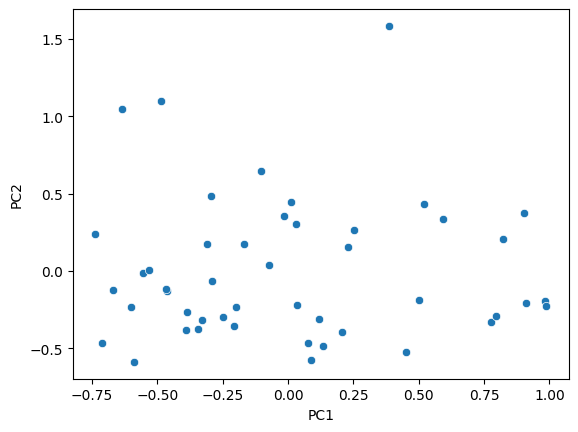

In [94]:
sb.scatterplot(y='PC2', x='PC1', data=df_pca)

In [95]:
K = range(2, 12)

inertias = []

for i in K:
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(df_scale) # entrenamiento de k-means con pca
  inertias.append(kmeans.inertia_)

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416:

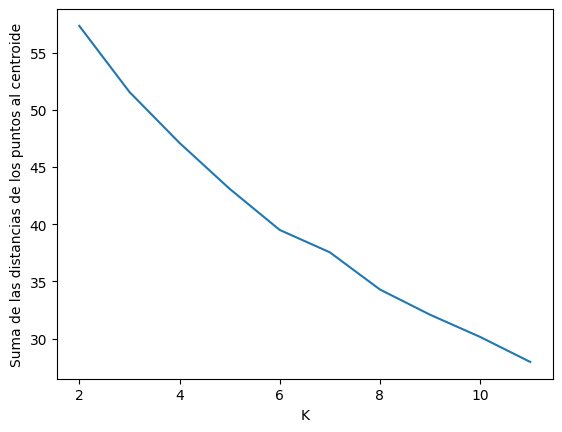

In [96]:
plt.plot(K, inertias) 
plt.xlabel("K")
plt.ylabel("Suma de las distancias de los puntos al centroide")
plt.show()

In [105]:
km = KMeans(n_clusters=6) # 4 K por el método del codo
km.fit_predict(df_scale)

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([2, 2, 5, 5, 1, 0, 0, 1, 4, 5, 2, 2, 0, 2, 3, 1, 0, 1, 4, 1, 4, 5,
       2, 4, 4, 0, 2, 2, 2, 2, 0, 4, 5, 5, 0, 0, 0, 0, 0, 5, 0, 0, 3, 5,
       3, 2, 3])

In [106]:
df_pca["Clusters"] = km.labels_
df_pca.head()

PC1       PC2  Clusters
0  0.230099  0.158010         2
1 -0.104579  0.645266         2
2  0.983089 -0.195280         5
3  0.776398 -0.330863         5
4 -0.386356 -0.264703         1

c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\idg20\Documents\AnalisisScouting6017\env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='PC1', ylabel='PC2'>

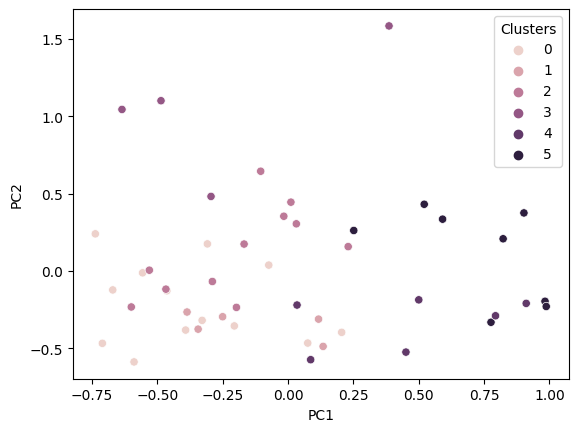

In [107]:
sb.scatterplot(y='PC2', x='PC1', hue = 'Clusters', data=df_pca)

In [108]:
df_scouting_by_teams.head()

Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  Mobility  \
Team                                                                         
93           2         0         4         0         0         2         5   
537          2         2         1         0         0         0         3   
706          0         0         2         0         0         4         4   
930          0         1         1         0         0         5         6   
1091         0         0         4         3         0         0         2   

      Docked_A  Engaged_A  Cub_L1_T  ...  Con_L2_T  Con_L3_T  Park  Docked_E  \
Team                                 ...                                       
93           1          2         2  ...         8         9     5         2   
537          1          2        27  ...         0         0     3         2   
706          1          3         2  ...         2        19     2         3   
930          2          0         1  ...         4        19     3         1   
1091         0          0         3  ...         4         0     6         3   

      Engaged_E  Double balance  Triple balance  Disconection time  \
Team                                                                 
93            5               2               3                  0   
537           7               4               3                  9   
706           6               3               3                 12   
930           2               0               2                  1   
1091          2               2               0                  7   

      Agressiveness  Clusters  
Team                           
93               11         1  
537              12         2  
706              10         1  
930              13         1  
1091             14         0  

[5 rows x 23 columns]

In [109]:
df_scouting_by_teams["Clusters"] = km.labels_
df_scouting_by_teams.head()

Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  Mobility  \
Team                                                                         
93           2         0         4         0         0         2         5   
537          2         2         1         0         0         0         3   
706          0         0         2         0         0         4         4   
930          0         1         1         0         0         5         6   
1091         0         0         4         3         0         0         2   

      Docked_A  Engaged_A  Cub_L1_T  ...  Con_L2_T  Con_L3_T  Park  Docked_E  \
Team                                 ...                                       
93           1          2         2  ...         8         9     5         2   
537          1          2        27  ...         0         0     3         2   
706          1          3         2  ...         2        19     2         3   
930          2          0         1  ...         4        19     3         1   
1091         0          0         3  ...         4         0     6         3   

      Engaged_E  Double balance  Triple balance  Disconection time  \
Team                                                                 
93            5               2               3                  0   
537           7               4               3                  9   
706           6               3               3                 12   
930           2               0               2                  1   
1091          2               2               0                  7   

      Agressiveness  Clusters  
Team                           
93               11         2  
537              12         2  
706              10         5  
930              13         5  
1091             14         1  

[5 rows x 23 columns]

In [110]:
df_scouting_by_teams.sort_values(by=["Clusters"])

Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  Mobility  \
Team                                                                         
6223         2         5         0         0         1         0         3   
5096         0         0         0         0         0         0         4   
6643         0         5         0         0         0         0         3   
7417         6         0         0         0         0         0         4   
7900         0         0         0         0         0         0         5   
1259         0         0         1         0         1         3         3   
1306         2         0         0         0         0         0         3   
8188         0         1         1         1         0         1         5   
8122         2         0         0         0         0         3         2   
7915         1         1         0         1         0         0         3   
2077         0         0         0         0         0         0         3   
2506         0         0         0         0         0         4         2   
8029         4         0         0         0         0         0         4   
3067         0         0         2         3         0         1         4   
2512         0         0         0         1         0         4         5   
2358         0         0         0         1         0         1         3   
1675         0         0         0         1         0         3         4   
1091         0         0         4         3         0         0         2   
2194         0         5         1         0         0         0         3   
2062         1         0         0         0         0         0         5   
1792         0         0         5         0         1         0         3   
3596         0         0         6         0         0         1         5   
8803         0         0         0         2         4         0         6   
537          2         2         1         0         0         0         3   
5148         1         2         1         0         0         0         2   
5822         6         0         0         0         0         0         3   
6017         0         1         2         0         0         1         5   
6160         0         1         6         0         0         0         8   
93           2         0         4         0         0         2         5   
8531         3         0         0         0         0         0         7   
8802         5         3         0         0         0         0         8   
8847         7         0         0         0         0         0         7   
2202         7         0         0         1         0         0         9   
4787         1         0         5         0         0         0         4   
3197         1         1         3         0         0         0         3   
2830         0         1         9         0         0         1         4   
1714         0         0         4         0         0         1         2   
6381         0         0         5         0         0         0         6   
4786         1         1         6         0         0         0         3   
6421         0         0         1         1         0         6         6   
6574         0         0         1         0         0         6         7   
3418         0         0         0         0         0         4         4   
8096         0         0         0         0         0         8         7   
1732         0         0         7         0         0         8         6   
930          0         1         1         0         0         5         6   
8701         0         0         0         0         0         8         6   
706          0         0         2         0         0         4         4   

      Docked_A  Engaged_A  Cub_L1_T  ...  Con_L2_T  Con_L3_T  Park  Docked_E  \
Team                                 ...                                       
6223         1         

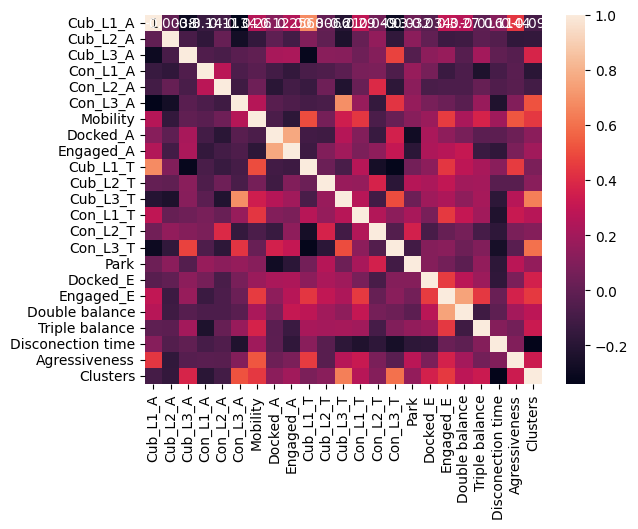

In [111]:
sb.heatmap(df_scouting_by_teams.corr(), annot=True)
mp.show()

In [104]:
df_scouting_by_teams.corr()

Cub_L1_A  Cub_L2_A  Cub_L3_A  Con_L1_A  Con_L2_A  Con_L3_A  \
Cub_L1_A           1.000000 -0.003838 -0.295148 -0.138360 -0.105133 -0.340947   
Cub_L2_A          -0.003838  1.000000 -0.088102 -0.171193  0.013960 -0.269208   
Cub_L3_A          -0.295148 -0.088102  1.000000 -0.061611 -0.082117 -0.031849   
Con_L1_A          -0.138360 -0.171193 -0.061611  1.000000  0.276520 -0.073239   
Con_L2_A          -0.105133  0.013960 -0.082117  0.276520  1.000000 -0.117050   
Con_L3_A          -0.340947 -0.269208 -0.031849 -0.073239 -0.117050  1.000000   
Mobility           0.260166 -0.159310 -0.009439 -0.028471  0.036366  0.257282   
Docked_A           0.116785 -0.012839  0.219044 -0.101481 -0.191961 -0.036672   
Engaged_A          0.250261 -0.100443  0.229550 -0.159285 -0.104896 -0.067609   
Cub_L1_T           0.680434  0.097773 -0.319087 -0.080715 -0.141389 -0.099318   
Cub_L2_T           0.006637 -0.009502  0.123067 -0.066975  0.038165 -0.082623   
Cub_L3_T          -0.208301 -0.236856  0.118799 -0.026454 -0.225550  0.689583   
Con_L1_T           0.288083  0.013027  0.041402  0.071840  0.017276  0.164004   
Con_L2_T           0.049214  0.150763  0.108538  0.079974  0.394293 -0.156694   
Con_L3_T          -0.295861 -0.165415  0.471181 -0.068509 -0.179392  0.433219   
Park               0.031727  0.129495 -0.045619  0.162276  0.127069  0.157026   
Docked_E          -0.033669 -0.000505  0.135542  0.064640 -0.082565  0.070620   
Engaged_E          0.295773 -0.128899  0.165897 -0.134294 -0.070214  0.026465   
Double balance     0.265304 -0.120749 -0.038013 -0.070591 -0.073625 -0.028286   
Triple balance    -0.015548 -0.019649  0.200554 -0.235707  0.013450  0.168334   
Disconection time  0.112600 -0.049116 -0.009122 -0.090595 -0.062434 -0.230076   
Agressiveness      0.437394 -0.163947 -0.040014 -0.030235 -0.035952  0.103826   
Clusters           0.584549 -0.079010 -0.063024 -0.212723 -0.180546  0.126074   

                   Mobility  Docked_A  Engaged_A  Cub_L1_T  ...  Con_L2_T  \
Cub_L1_A           0.260166  0.116785   0.250261  0.680434  ...  0.049214   
Cub_L2_A          -0.159310 -0.012839  -0.100443  0.097773  ...  0.150763   
Cub_L3_A          -0.009439  0.219044   0.229550 -0.319087  ...  0.108538   
Con_L1_A          -0.028471 -0.101481  -0.159285 -0.080715  ...  0.079974   
Con_L2_A           0.036366 -0.191961  -0.104896 -0.141389  ...  0.394293   
Con_L3_A           0.257282 -0.036672  -0.067609 -0.099318  ... -0.156694   
Mobility           1.000000 -0.076233  -0.182671  0.499428  ... -0.077430   
Docked_A          -0.076233  1.000000   0.766411 -0.105621  ... -0.136932   
Engaged_A         -0.182671  0.766411   1.000000 -0.126004  ...  0.138216   
Cub_L1_T           0.499428 -0.105621  -0.126004  1.000000  ... -0.263259   
Cub_L2_T           0.057640 -0.120516   0.095965  0.026508  ...  0.369962   
Cub_L3_T           0.342150  0.259759   0.196821 -0.081745  ... -0.107754   
Con_L1_T           0.434789  0.103197   0.078907  0.262039  ...  0.249052   
Con_L2_T          -0.077430 -0.136932   0.138216 -0.263259  ...  1.000000   
Con_L3_T           0.019159  0.360864   0.308469 -0.330137  ... -0.050149   
Park               0.115155 -0.282811  -0.187717  0.053983  ...  0.358037   
Docked_E           0.177271  0.223605   0.231457  0.132416  ... -0.086701   
Engaged_E          0.455188  0.139260   0.265117  0.436715  ...  0.014522   
Double balance     0.220669  0.067712   0.313243  0.287451  ...  0.058227   
Triple balance     0.366833 -0.025890  -0.136323  0.215644  ... -0.092166   
Disconection time  0.193244 -0.017178  -0.168349  0.121757  ... -0.174648   
Agressiveness      0.526833  0.033574   0.079997  0.454268  ...  0.074734   
Clusters           0.607913  0.033417  -0.013655  0.760925  ... -0.177575   

                   Con_L3_T      Park  Docked_E  Engaged_E  Double balance  \
Cub_L1_A          -0.295861  0.031727 -0.033669   0.295773        0.265304   
Cub_L2_A          -0.165415  0.129495 -0.000505  -0.128899       -0.1

---